# üîé DEFINICI√ìN DEL PROBLEMA (en revisi√≥n)

üéØ Objetivo general: Analizar el impacto de la pandemia en la cobertura educativa y la deserci√≥n escolar a nivel nacional, identificando factores clave que influyeron en la permanencia de los estudiantes colombianos en el sistema educativo.

üîπ Objetivos Espec√≠ficos: 

‚úÖ Comparar la evoluci√≥n de la cobertura neta y bruta antes, durante y despu√©s de la pandemia en los distintos niveles (transici√≥n, primaria, secundaria y media) para detectar cambios en el acceso y matriculaci√≥n de estudiantes.

‚úÖ Evaluar la relaci√≥n entre la deserci√≥n escolar y factores como repitencia y aprobaci√≥n en el periodo 2020-2022 y su variaci√≥n respecto a los a√±os anteriores.

‚úÖ --->>> A REVISAR YA QUE NO VAMOS A USAR SEDES CONECTADAS A INTERNET <<<-----  Identificar y clasificar los municipios seg√∫n su nivel de conectividad, analizando las diferencias con respecto a los municipios cuyas instituciones tienen alta conectividad.

‚úÖ Visualizar los datos analizados con respecto a las variaciones en cobertura y deserci√≥n escolar teniendo en cuenta los departamentos a nivel nacional.


Modelo de predicci√≥n

# Pregunta problema: ¬øC√≥mo impact√≥ la pandemia los niveles de cobertura, de deserci√≥n y repitencia en el sistema educativo colombiano?

Impact√≥ la pandemia los niveles de cobertura, desersi√≥n y repitencia escolar a nivel nacional?

La pandemia Impact√≥ los niveles de cobertura y desersi√≥n escolar a nivel nacional?

# üîç 1.--- EDA (Exploraci√≥n y Analisis de Datos)---

üìÇ1.1--- Importar las librer√≠as necesarias ---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

üì•1.2 --- Carga de datos ---

In [2]:
data= pd.read_csv("Estad√≠sticas en Educaci√≥n.csv")
data.head()

A√ëO  C√ìDIGO_MUNICIPIO   MUNICIPIO  C√ìDIGO_DEPARTAMENTO DEPARTAMENTO  \
0  2023              5001    Medell√≠n                    5    Antioquia   
1  2023              5002   Abejorral                    5    Antioquia   
2  2023              5004    Abriaqu√≠                    5    Antioquia   
3  2023              5021  Alejandr√≠a                    5    Antioquia   
4  2023              5030       Amag√°                    5    Antioquia   

   C√ìDIGO_ETC              ETC POBLACI√ìN_5_16  TASA_MATRICULACI√ìN_5_16  \
0      3759.0         Medell√≠n         377562                    96.15   
1      3758.0  Antioquia (ETC)           3634                    74.38   
2      3758.0  Antioquia (ETC)            503                    62.62   
3      3758.0  Antioquia (ETC)            864                    81.37   
4      3758.0  Antioquia (ETC)           5060                    78.30   

   COBERTURA_NETA  ...  REPROBACI√ìN  REPROBACI√ìN_TRANSICI√ìN  \
0           95.94  ...         9.23                    0.15   
1           74.38  ...         7.77                    0.56   
2           62.62  ...         6.55                    0.00   
3           81.37  ...         7.88                    0.00   
4           78.30  ...        10.71                    0.00   

   REPROBACI√ìN_PRIMARIA  REPROBACI√ìN_SECUNDARIA  REPROBACI√ìN_MEDIA  \
0                  6.21                   15.40               7.27   
1                  7.26                   10.93               4.41   
2                  1.96                   16.51               2.04   
3                  7.02                   13.65               2.40   
4                  9.63                   16.48               5.50   

   REPITENCIA  REPITENCIA_TRANSICI√ìN  REPITENCIA_PRIMARIA  \
0        9.25                   1.82                 8.34   
1        9.07                   1.67                10.28   
2        9.52                   0.00                10.46   
3        7.20                   1.59                 7.69   
4       12.08                   0.29                11.54   

   REPITENCIA_SECUNDARIA  REPITENCIA_MEDIA  
0                  13.69              4.48  
1                  11.32              2.20  
2                  13.76              2.04  
3                  11.65              0.00  
4                  18.48              3.98  

[5 rows x 41 columns]

In [3]:
# Informacion general del Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   A√ëO                          14585 non-null  int64  
 1   C√ìDIGO_MUNICIPIO             14585 non-null  int64  
 2   MUNICIPIO                    14585 non-null  object 
 3   C√ìDIGO_DEPARTAMENTO          14585 non-null  int64  
 4   DEPARTAMENTO                 14585 non-null  object 
 5   C√ìDIGO_ETC                   14585 non-null  float64
 6   ETC                          14585 non-null  object 
 7   POBLACI√ìN_5_16               14579 non-null  object 
 8   TASA_MATRICULACI√ìN_5_16      14470 non-null  float64
 9   COBERTURA_NETA               14474 non-null  float64
 10  COBERTURA_NETA_TRANSICI√ìN    14533 non-null  float64
 11  COBERTURA_NETA_PRIMARIA      14494 non-null  float64
 12  COBERTURA_NETA_SECUNDARIA    14491 non-null  float64
 13  COBERTURA

üî¨1.3 --- Exploraci√≥n de datos ---

In [4]:
# Verificaci√≥n de valores nulos en las columnas
print("Columnas con datos faltantes:")
null_cols= data.columns[data.isnull().any()]
for col in null_cols:
    print(f"Columna: {col} ‚Üí Nulos: {data[col].isnull().sum()} ‚Üí Tipo: {data[col].dtype}")

Columnas con datos faltantes:
Columna: POBLACI√ìN_5_16 ‚Üí Nulos: 6 ‚Üí Tipo: object
Columna: TASA_MATRICULACI√ìN_5_16 ‚Üí Nulos: 115 ‚Üí Tipo: float64
Columna: COBERTURA_NETA ‚Üí Nulos: 111 ‚Üí Tipo: float64
Columna: COBERTURA_NETA_TRANSICI√ìN ‚Üí Nulos: 52 ‚Üí Tipo: float64
Columna: COBERTURA_NETA_PRIMARIA ‚Üí Nulos: 91 ‚Üí Tipo: float64
Columna: COBERTURA_NETA_SECUNDARIA ‚Üí Nulos: 94 ‚Üí Tipo: float64
Columna: COBERTURA_NETA_MEDIA ‚Üí Nulos: 93 ‚Üí Tipo: float64
Columna: COBERTURA_BRUTA ‚Üí Nulos: 68 ‚Üí Tipo: float64
Columna: COBERTURA_BRUTA_TRANSICI√ìN ‚Üí Nulos: 97 ‚Üí Tipo: float64
Columna: COBERTURA_BRUTA_PRIMARIA ‚Üí Nulos: 81 ‚Üí Tipo: float64
Columna: COBERTURA_BRUTA_SECUNDARIA ‚Üí Nulos: 88 ‚Üí Tipo: float64
Columna: COBERTURA_BRUTA_MEDIA ‚Üí Nulos: 127 ‚Üí Tipo: float64
Columna: TAMA√ëO_PROMEDIO_DE_GRUPO ‚Üí Nulos: 7013 ‚Üí Tipo: float64
Columna: SEDES_CONECTADAS_A_INTERNET ‚Üí Nulos: 6817 ‚Üí Tipo: float64
Columna: DESERCI√ìN ‚Üí Nulos: 142 ‚Üí Tipo: float64
Columna: DES

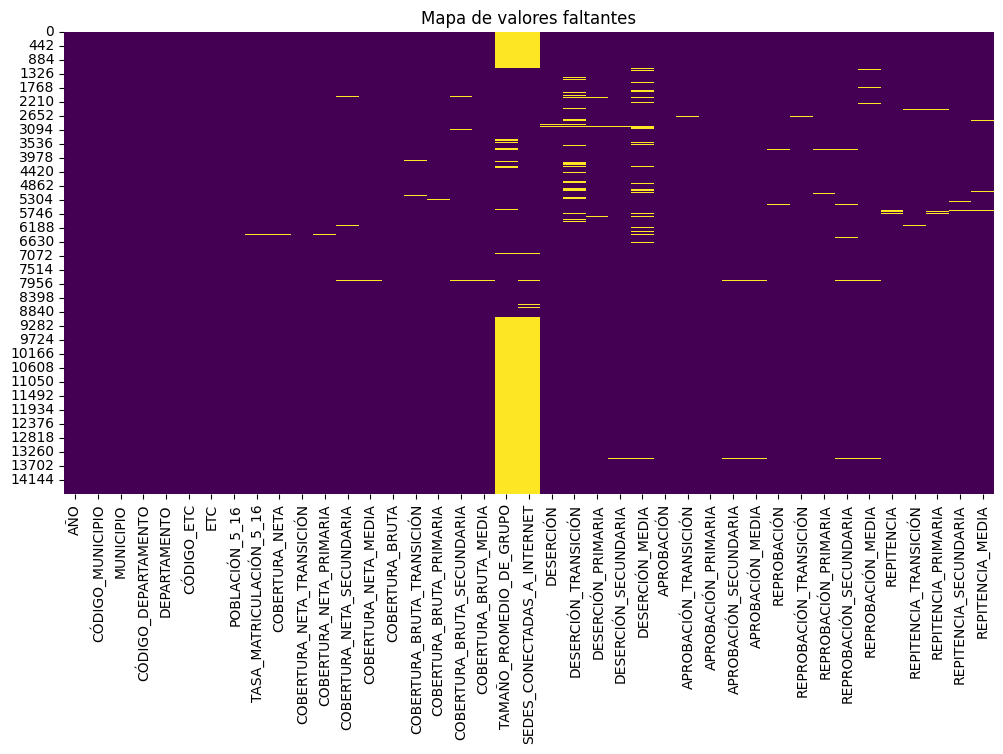

In [5]:
#Gr√°fica de datos faltantes
import seaborn as sns
import matplotlib.pyplot as plt
# Crear una figura
plt.figure(figsize=(12,6))
# Generar el heatmap de valores faltantes
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
# Agregar t√≠tulo
plt.title("Mapa de valores faltantes")
plt.show()

In [6]:
#Verificaci√≥n de filas y columnas duplicadas

# Filas duplicadas
duplicate_rows = data[data.duplicated()]

# Columnas duplicadas
duplicate_columns = data.T.duplicated(keep=False)
duplicated_column_names = data.columns[duplicate_columns]

# Mostrar resultados
print(f" Total de filas duplicadas: {duplicate_rows.shape[0]}")
if not duplicate_rows.empty:
    print("\n Filas duplicadas en el dataset:")
    print(duplicate_rows)
else:
    print("\n No hay filas duplicadas.")

print("\n Columnas duplicadas en el dataset:")
if len(duplicated_column_names) > 0:
    print(duplicated_column_names.tolist())
else:
    print("\n No hay columnas duplicadas.")

 Total de filas duplicadas: 0

 No hay filas duplicadas.

 Columnas duplicadas en el dataset:
['APROBACI√ìN_TRANSICI√ìN', 'REPROBACI√ìN_TRANSICI√ìN']


In [7]:
# Descripci√≥n de las columnas duplicadas detectadas
duplicated_columns = ['APROBACI√ìN_TRANSICI√ìN', 'REPROBACI√ìN_TRANSICI√ìN']
# Mostrar el contenido de las columnas duplicadas
print("üìå Valores en las columnas duplicadas:")
print(data[duplicated_columns])

üìå Valores en las columnas duplicadas:
       APROBACI√ìN_TRANSICI√ìN  REPROBACI√ìN_TRANSICI√ìN
0                       0.15                    0.15
1                       0.56                    0.56
2                       0.00                    0.00
3                       0.00                    0.00
4                       0.00                    0.00
...                      ...                     ...
14580                   0.00                    0.00
14581                   0.23                    0.23
14582                   0.00                    0.00
14583                   0.00                    0.00
14584                   0.10                    0.10

[14585 rows x 2 columns]


In [8]:
#Verificar los valores "0" (cero) de cada columna num√©rica
(data == 0).sum()

A√ëO                                0
C√ìDIGO_MUNICIPIO                   3
MUNICIPIO                          0
C√ìDIGO_DEPARTAMENTO                3
DEPARTAMENTO                       0
C√ìDIGO_ETC                         3
ETC                                0
POBLACI√ìN_5_16                     0
TASA_MATRICULACI√ìN_5_16            5
COBERTURA_NETA                     8
COBERTURA_NETA_TRANSICI√ìN          9
COBERTURA_NETA_PRIMARIA            8
COBERTURA_NETA_SECUNDARIA         26
COBERTURA_NETA_MEDIA              50
COBERTURA_BRUTA                    8
COBERTURA_BRUTA_TRANSICI√ìN         8
COBERTURA_BRUTA_PRIMARIA           8
COBERTURA_BRUTA_SECUNDARIA        26
COBERTURA_BRUTA_MEDIA             43
TAMA√ëO_PROMEDIO_DE_GRUPO           0
SEDES_CONECTADAS_A_INTERNET      284
DESERCI√ìN                         55
DESERCI√ìN_TRANSICI√ìN            1219
DESERCI√ìN_PRIMARIA               355
DESERCI√ìN_SECUNDARIA             195
DESERCI√ìN_MEDIA                  698
APROBACI√ìN            

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2800\635731421.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zero_df, x='% de Ceros', y='Columna', palette='coolwarm')


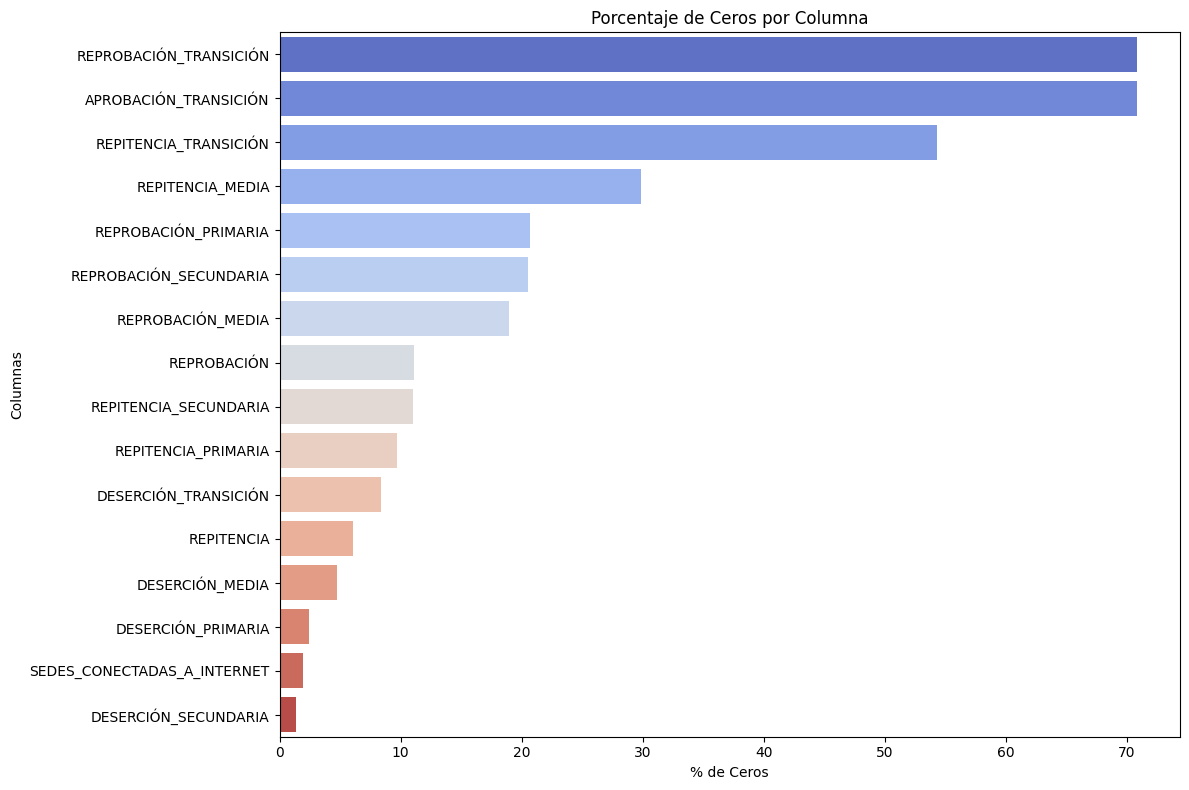

In [9]:
# Calcular % de ceros por columna
zero_counts = (data == 0).sum()
total_rows = len(data)
zero_percentage = (zero_counts / total_rows) * 100

# Crear DataFrame para visualizaci√≥n
zero_df = pd.DataFrame({
    'Columna': zero_counts.index,
    '% de Ceros': zero_percentage
}).sort_values('% de Ceros', ascending=False)

# Filtrar columnas con al menos 1% de ceros (puedes cambiar el umbral)
zero_df = zero_df[zero_df['% de Ceros'] > 1]

# Visualizaci√≥n con seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=zero_df, x='% de Ceros', y='Columna', palette='coolwarm')
plt.title('Porcentaje de Ceros por Columna')
plt.xlabel('% de Ceros')
plt.ylabel('Columnas')
plt.tight_layout()
plt.show()

In [10]:
# Tabla resumen por columna num√©rica
summary = pd.DataFrame({
    'Columna': data.columns,
    '% de Ceros': (data == 0).sum() / len(data) * 100,
    '% Nulos': data.isnull().sum() / len(data) * 100,
    'Valores √önicos': data.nunique()
}).sort_values(['% de Ceros', '% Nulos'], ascending=False)

# Agregar una sugerencia automatizada
summary['Sugerencia'] = summary.apply(
    lambda row: '‚ùå Revisar (muchos ceros/nulos o constante)' 
        if (row['% de Ceros'] > 50 or row['% Nulos'] > 50 or row['Valores √önicos'] <= 1)
    else '‚ö†Ô∏è Considerar (alta proporci√≥n de ceros o pocos valores)'
        if (row['% de Ceros'] > 30 or row['Valores √önicos'] <= 3)
    else '‚úÖ Conservar', axis=1
)

# Mostrar las columnas m√°s problem√°ticas primero
summary.reset_index(drop=True, inplace=True)
summary.head(41)  # Puedes cambiar el n√∫mero de filas mostradas

Columna  % de Ceros    % Nulos  Valores √önicos  \
0         APROBACI√ìN_TRANSICI√ìN   70.826191   0.637641             660   
1        REPROBACI√ìN_TRANSICI√ìN   70.826191   0.637641             660   
2         REPITENCIA_TRANSICI√ìN   54.268084   1.090161             876   
3              REPITENCIA_MEDIA   29.852588   0.953034             963   
4          REPROBACI√ìN_PRIMARIA   20.692492   0.665067            1487   
5        REPROBACI√ìN_SECUNDARIA   20.527940   0.726774            2211   
6             REPROBACI√ìN_MEDIA   18.964690   0.994172            1600   
7                   REPROBACI√ìN   11.141584   0.589647            1569   
8         REPITENCIA_SECUNDARIA   11.025026   1.042167            1770   
9           REPITENCIA_PRIMARIA    9.729174   1.014741            1495   
10         DESERCI√ìN_TRANSICI√ìN    8.357902   6.191292            1157   
11                   REPITENCIA    6.102160   0.980459            1401   
12              DESERCI√ìN_MEDIA    4.785739   5.032568            1199   
13           DESERCI√ìN_PRIMARIA    2.434008   1.659239            1001   
14  SEDES_CONECTADAS_A_INTERNET    1.947206  46.739801            1402   
15         DESERCI√ìN_SECUNDARIA    1.336990   1.851217            1426   
16                    DESERCI√ìN    0.377100   0.973603            1086   
17         COBERTURA_NETA_MEDIA    0.342818   0.637641            5049   
18        COBERTURA_BRUTA_MEDIA    0.294823   0.870758            6628   
19    COBERTURA_NETA_SECUNDARIA    0.178265   0.644498            5581   
20   COBERTURA_BRUTA_SECUNDARIA    0.178265   0.603360            6732   
21             APROBACI√ìN_MEDIA    0.150840   0.692492            2196   
22        APROBACI√ìN_SECUNDARIA    0.095989   0.370243            2903   
23    COBERTURA_NETA_TRANSICI√ìN    0.061707   0.356531            5021   
24               COBERTURA_NETA    0.054851   0.761056            5276   
25   COBERTURA_BRUTA_TRANSICI√ìN    0.054851   0.665067            6286   
26      COBERTURA_NETA_PRIMARIA    0.054851   0.623929            5269   
27     COBERTURA_BRUTA_PRIMARIA    0.054851   0.555365            6554   
28              COBERTURA_BRUTA    0.054851   0.466232            6147   
29      TASA_MATRICULACI√ìN_5_16    0.034282   0.788481            5826   
30                   APROBACI√ìN    0.020569   0.171409            2128   
31          APROBACI√ìN_PRIMARIA    0.020569   0.171409            1976   
32             C√ìDIGO_MUNICIPIO    0.020569   0.000000            1123   
33          C√ìDIGO_DEPARTAMENTO    0.020569   0.000000              34   
34                   C√ìDIGO_ETC    0.020569   0.000000             194   
35     TAMA√ëO_PROMEDIO_DE_GRUPO    0.000000  48.083648            4232   
36               POBLACI√ìN_5_16    0.000000   0.041138            8527   
37                          A√ëO    0.000000   0.000000              13   
38                    MUNICIPIO    0.000000   0.000000            1037   
39                 DEPARTAMENTO    0.000000   0.000000              36   
40                          ETC    0.000000   0.000000             100   

                                    Sugerencia  
0   ‚ùå Revisar (muchos ceros/nulos o constante)  
1   ‚ùå Revisar (muchos ceros/nulos o constante)  
2   ‚ùå Revisar (muchos ceros/nulos o constante)  
3                                  ‚úÖ Conservar  
4                                  ‚úÖ Conservar  
5                                  ‚úÖ Conservar  
6                                  ‚úÖ Conservar  
7                                  ‚úÖ Conservar  
8                                  ‚úÖ Conservar  
9                                  ‚úÖ Conservar  
10                                 ‚úÖ Conservar  
11                                 ‚úÖ Conservar  
12                                 ‚úÖ Conservar  
13                                 ‚úÖ Conservar  
14                                 ‚úÖ Conservar  
15                                 ‚úÖ Conservar  
16                   

üí°1.3.1 --- Hallazgos parciales --- 

üü†‚Üí Las columnas 'TAMA√ëO_PROMEDIO_DE_GRUPO' y 'SEDES_CONECTADAS_A_INTERNET' presentan 7013 y 6817 valores nulos respectivamentes, se eliminar√≥n del dataset ya que no aportan significativamenta al problema/hipotesis tomado como objeto de estudio. 

üü†‚Üí  Las columnas 'APROBACI√ìN_TRANSICI√ìN' y 'REPROBACI√ìN_TRANSICI√ìN' est√°n duplicadas, se decidi√≥ eliminar 'APROBACI√ìN_TRANSICI√ìN'.

üü†‚Üí  las columnas tipo id  o c√≥digo se eliminaron ya que est√°n representadas en otras columnas de diferente manera.Estas son: 'C√ìDIGO_MUNICIPIO', 'C√ìDIGO_DEPARTAMENTO'y 'C√ìDIGO_ETC'.

üü†‚Üí  REPITENCIA_TRANSICI√ìN en la tabla resumen por columna arroja una sugerencia de revisi√≥n, sin embargo debido a su significado, mientras m√°s valores 0 tenga puede significar que los estudiantes en transici√≥n no repitieron periodo escolar. El 0 es el mejor valor ya que los casos de repitencia son bajos, entonces seguimos considerando hasta el momento esta columna para nuestro estudio.

üßº 1.4 Limpieza preliminar del dataset

Se eliminan las columnas 'C√ìDIGO_MUNICIPIO', 'C√ìDIGO_DEPARTAMENTO', 'C√ìDIGO_ETC', 'APROBACI√ìN_TRANSICI√ìN', 'TAMA√ëO_PROMEDIO_DE_GRUPO' y 'SEDES_CONECTADAS_A_INTERNET'

In [11]:
#Eliminar columnas no necesarias para el an√°lisis
data = data.drop(columns=['C√ìDIGO_MUNICIPIO', 'C√ìDIGO_DEPARTAMENTO', 'C√ìDIGO_ETC', 'APROBACI√ìN_TRANSICI√ìN','TAMA√ëO_PROMEDIO_DE_GRUPO','SEDES_CONECTADAS_A_INTERNET'])

In [12]:
print("--- Primeras filas del DataFrame luego de eliminar columnas ---")
data.head()

--- Primeras filas del DataFrame luego de eliminar columnas ---


A√ëO   MUNICIPIO DEPARTAMENTO              ETC POBLACI√ìN_5_16  \
0  2023    Medell√≠n    Antioquia         Medell√≠n         377562   
1  2023   Abejorral    Antioquia  Antioquia (ETC)           3634   
2  2023    Abriaqu√≠    Antioquia  Antioquia (ETC)            503   
3  2023  Alejandr√≠a    Antioquia  Antioquia (ETC)            864   
4  2023       Amag√°    Antioquia  Antioquia (ETC)           5060   

   TASA_MATRICULACI√ìN_5_16  COBERTURA_NETA  COBERTURA_NETA_TRANSICI√ìN  \
0                    96.15           95.94                      81.42   
1                    74.38           74.38                      50.55   
2                    62.62           62.62                      44.19   
3                    81.37           81.37                      61.45   
4                    78.30           78.30                      67.65   

   COBERTURA_NETA_PRIMARIA  COBERTURA_NETA_SECUNDARIA  ...  REPROBACI√ìN  \
0                    94.01                      83.58  ...         9.23   
1                    74.32                      63.78  ...         7.77   
2                    63.33                      51.53  ...         6.55   
3                    73.21                      77.74  ...         7.88   
4                    76.96                      65.61  ...        10.71   

   REPROBACI√ìN_TRANSICI√ìN  REPROBACI√ìN_PRIMARIA  REPROBACI√ìN_SECUNDARIA  \
0                    0.15                  6.21                   15.40   
1                    0.56                  7.26                   10.93   
2                    0.00                  1.96                   16.51   
3                    0.00                  7.02                   13.65   
4                    0.00                  9.63                   16.48   

   REPROBACI√ìN_MEDIA  REPITENCIA  REPITENCIA_TRANSICI√ìN  REPITENCIA_PRIMARIA  \
0               7.27        9.25                   1.82                 8.34   
1               4.41        9.07                   1.67                10.28   
2               2.04        9.52                   0.00                10.46   
3               2.40        7.20                   1.59                 7.69   
4               5.50       12.08                   0.29                11.54   

   REPITENCIA_SECUNDARIA  REPITENCIA_MEDIA  
0                  13.69              4.48  
1                  11.32              2.20  
2                  13.76              2.04  
3                  11.65              0.00  
4                  18.48              3.98  

[5 rows x 35 columns]

In [13]:
print("--- Informaci√≥n de DataFrame luego de eliminar columnas ---")
data.info() 

--- Informaci√≥n de DataFrame luego de eliminar columnas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   A√ëO                         14585 non-null  int64  
 1   MUNICIPIO                   14585 non-null  object 
 2   DEPARTAMENTO                14585 non-null  object 
 3   ETC                         14585 non-null  object 
 4   POBLACI√ìN_5_16              14579 non-null  object 
 5   TASA_MATRICULACI√ìN_5_16     14470 non-null  float64
 6   COBERTURA_NETA              14474 non-null  float64
 7   COBERTURA_NETA_TRANSICI√ìN   14533 non-null  float64
 8   COBERTURA_NETA_PRIMARIA     14494 non-null  float64
 9   COBERTURA_NETA_SECUNDARIA   14491 non-null  float64
 10  COBERTURA_NETA_MEDIA        14492 non-null  float64
 11  COBERTURA_BRUTA             14517 non-null  float64
 12  COBERTURA_BRUTA_TRANSIC

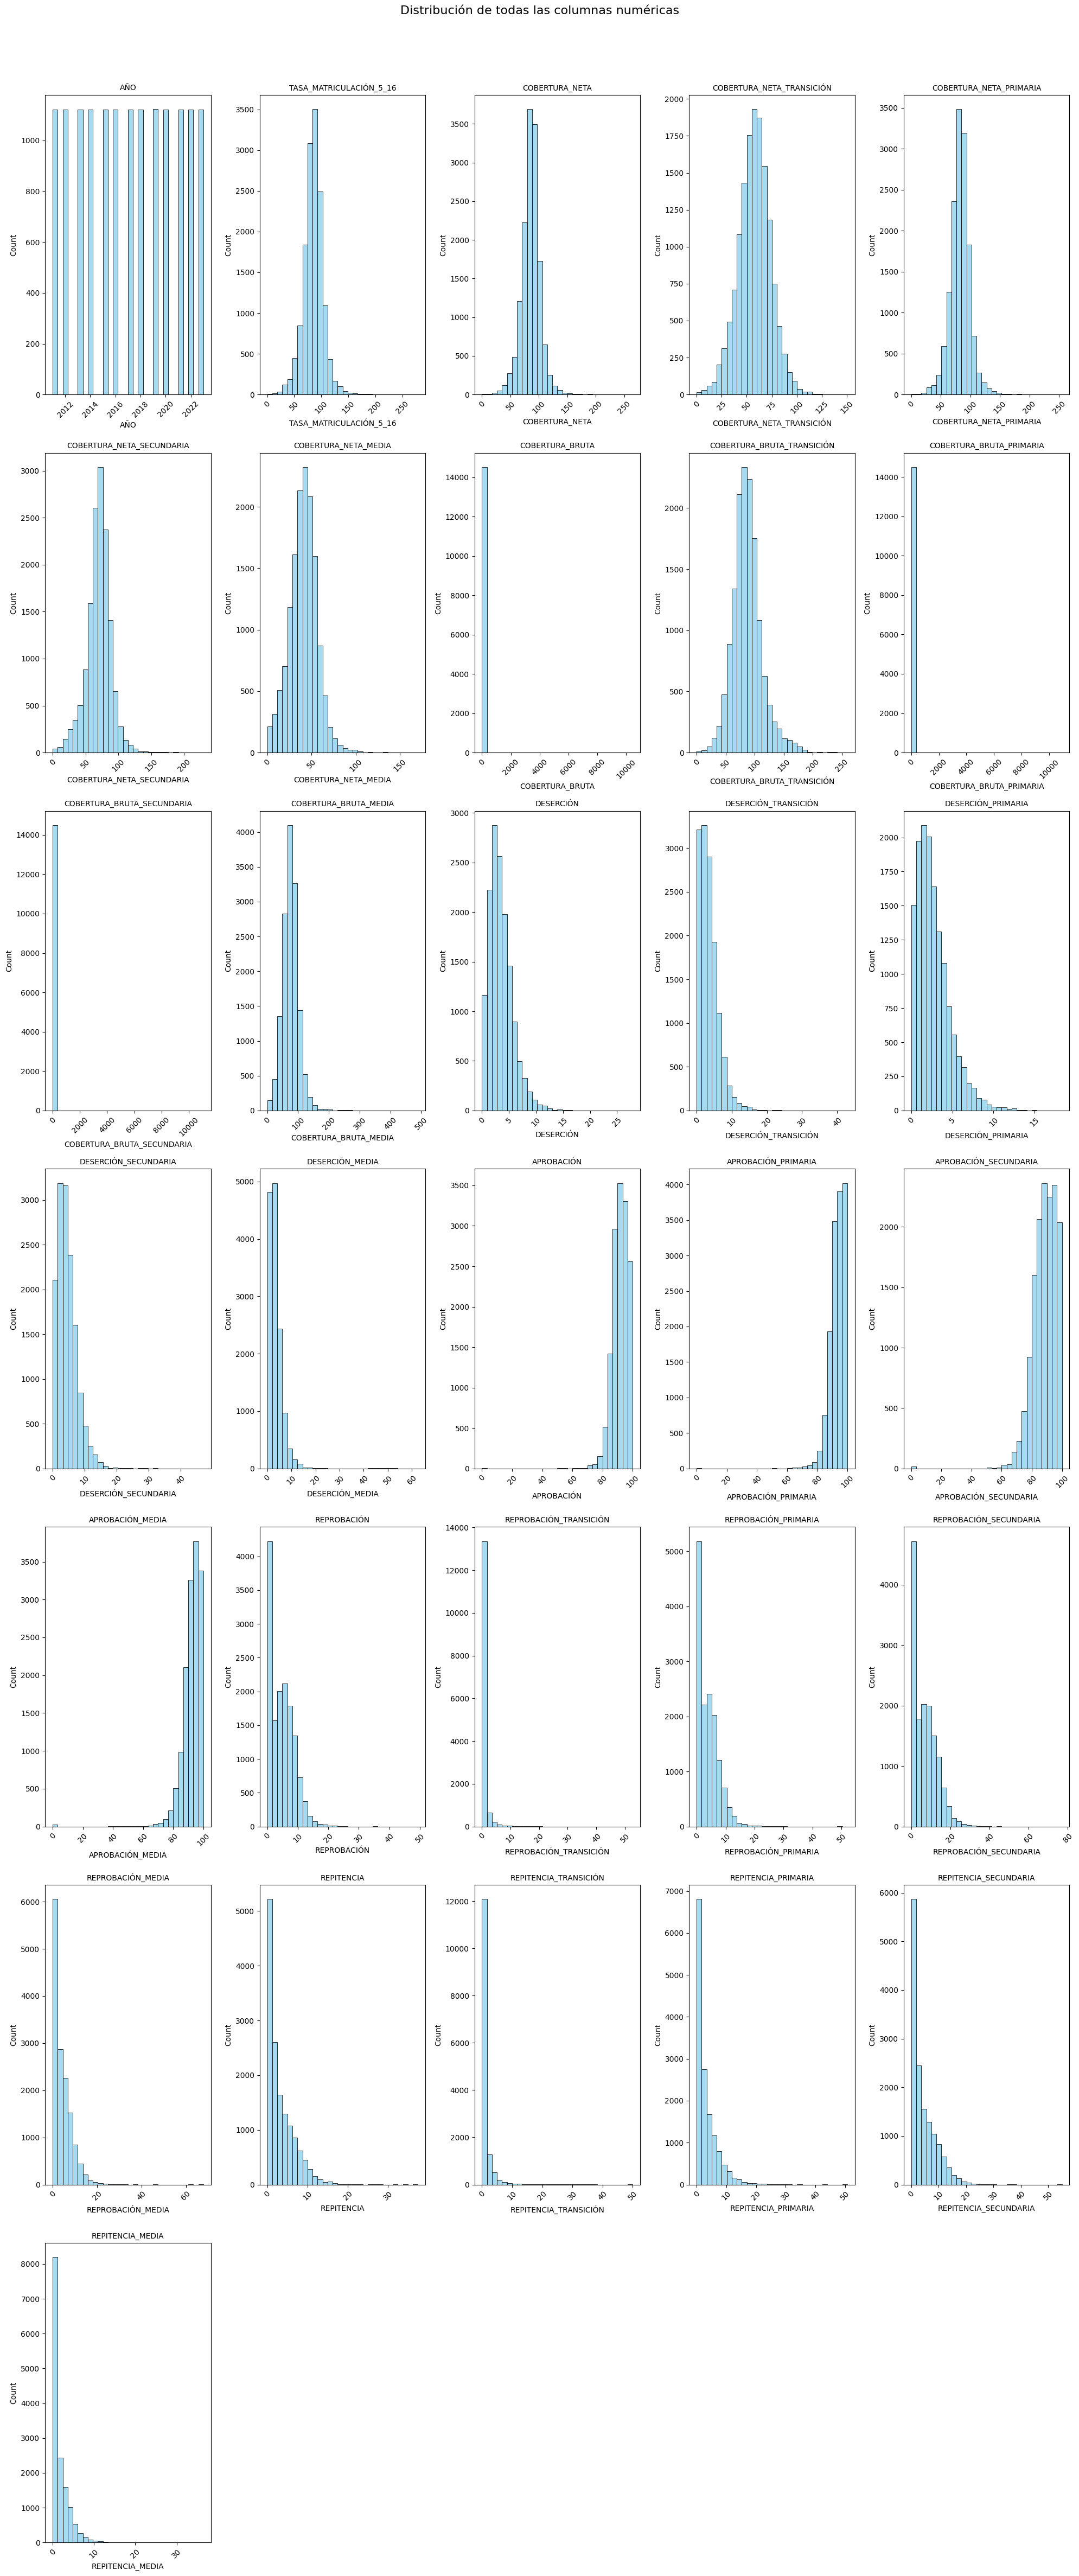

In [14]:
# Verificar la distribuci√≥n de los datos en columnas num√©ricas
numeric_cols = data.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=(len(numeric_cols) // 5) + 1, ncols=5, figsize=(20, len(numeric_cols) * 1.5))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col].dropna(), kde=False, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribuci√≥n de todas las columnas num√©ricas", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Dado que el gr√°fico muestra distribuciones asim√©tricas en varias variables, la imputaci√≥n de valores nulos con la mediana es la estrategia m√°s adecuada. A diferencia de la media, la mediana no se ve afectada por valores extremos, lo que permite una representaci√≥n m√°s robusta de la tendencia central de los datos. Usar la mediana garantiza que la imputaci√≥n refleje mejor el patr√≥n real de los datos sin distorsionar la variabilidad presente en el conjunto de datos. Se ibserva tambien el sesgo en algunas distribuci√≥nes de datos y aunque puede ser una se√±al de valores at√≠picos, no siempre significa que haya outliers.

üî¢ 1.5 --- Imputaci√≥n de valores nulos en columnas ---

Observando que la columna 'POBLACI√ìN_5_16' tiene el tipo de dato Object, procedemos a cambiarlo a int64. Luego se eliminaron car√°cteres extras, para finalmente imputar la mediana a los valores nulos del DataFrame.

In [15]:
#Convertir los datos de la columna 'POBLACI√ìN_5_16' de object a int64
# Verificar valores √∫nicos para identificar problemas
print(data['POBLACI√ìN_5_16'].unique())

# Limpiar la columna eliminando caracteres extra y manejar valores no num√©ricos
data['POBLACI√ìN_5_16'] = pd.to_numeric(data['POBLACI√ìN_5_16'].str.replace(',', '').str.strip(), errors='coerce')

# Rellenar valores nulos con la mediana
data['POBLACI√ìN_5_16'].fillna(data['POBLACI√ìN_5_16'].median(), inplace=True)

# Convertir a entero
data['POBLACI√ìN_5_16'] = data['POBLACI√ìN_5_16'].astype(int)

# Verificar la conversi√≥n
print("--- Tipo de dato en columnas ---")
print(data.dtypes)

['377562' '3634' '503' ... '208' '4697' '25396']
--- Tipo de dato en columnas ---
A√ëO                             int64
MUNICIPIO                      object
DEPARTAMENTO                   object
ETC                            object
POBLACI√ìN_5_16                  int64
TASA_MATRICULACI√ìN_5_16       float64
COBERTURA_NETA                float64
COBERTURA_NETA_TRANSICI√ìN     float64
COBERTURA_NETA_PRIMARIA       float64
COBERTURA_NETA_SECUNDARIA     float64
COBERTURA_NETA_MEDIA          float64
COBERTURA_BRUTA               float64
COBERTURA_BRUTA_TRANSICI√ìN    float64
COBERTURA_BRUTA_PRIMARIA      float64
COBERTURA_BRUTA_SECUNDARIA    float64
COBERTURA_BRUTA_MEDIA         float64
DESERCI√ìN                     float64
DESERCI√ìN_TRANSICI√ìN          float64
DESERCI√ìN_PRIMARIA            float64
DESERCI√ìN_SECUNDARIA          float64
DESERCI√ìN_MEDIA               float64
APROBACI√ìN                    float64
APROBACI√ìN_PRIMARIA           float64
APROBACI√ìN_SECUNDARIA         

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2800\3004672560.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['POBLACI√ìN_5_16'].fillna(data['POBLACI√ìN_5_16'].median(), inplace=True)


In [16]:
# Hacer la imputaci√≥n del resto de las columnas num√©ricas con la mediana

# Seleccionar solo las columnas num√©ricas
columnas_numericas = data.select_dtypes(include=['number']).columns

# Reemplazar valores nulos con la mediana de cada columna num√©rica
data[columnas_numericas] = data[columnas_numericas].apply(lambda x: x.fillna(x.median()))

# Verificar que ya no haya valores nulos en ninguna de las columnas
print("--- Cantidad de valores nulos en columnas ---")
print(data.isnull().sum())

--- Cantidad de valores nulos en columnas ---
A√ëO                           0
MUNICIPIO                     0
DEPARTAMENTO                  0
ETC                           0
POBLACI√ìN_5_16                0
TASA_MATRICULACI√ìN_5_16       0
COBERTURA_NETA                0
COBERTURA_NETA_TRANSICI√ìN     0
COBERTURA_NETA_PRIMARIA       0
COBERTURA_NETA_SECUNDARIA     0
COBERTURA_NETA_MEDIA          0
COBERTURA_BRUTA               0
COBERTURA_BRUTA_TRANSICI√ìN    0
COBERTURA_BRUTA_PRIMARIA      0
COBERTURA_BRUTA_SECUNDARIA    0
COBERTURA_BRUTA_MEDIA         0
DESERCI√ìN                     0
DESERCI√ìN_TRANSICI√ìN          0
DESERCI√ìN_PRIMARIA            0
DESERCI√ìN_SECUNDARIA          0
DESERCI√ìN_MEDIA               0
APROBACI√ìN                    0
APROBACI√ìN_PRIMARIA           0
APROBACI√ìN_SECUNDARIA         0
APROBACI√ìN_MEDIA              0
REPROBACI√ìN                   0
REPROBACI√ìN_TRANSICI√ìN        0
REPROBACI√ìN_PRIMARIA          0
REPROBACI√ìN_SECUNDARIA        0
REPROB

In [17]:
#Visualizamos la informaci√≥n del dataset limpio
print("--- Informaci√≥n del Dataset limpio ---")
data.info()

--- Informaci√≥n del Dataset limpio ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   A√ëO                         14585 non-null  int64  
 1   MUNICIPIO                   14585 non-null  object 
 2   DEPARTAMENTO                14585 non-null  object 
 3   ETC                         14585 non-null  object 
 4   POBLACI√ìN_5_16              14585 non-null  int64  
 5   TASA_MATRICULACI√ìN_5_16     14585 non-null  float64
 6   COBERTURA_NETA              14585 non-null  float64
 7   COBERTURA_NETA_TRANSICI√ìN   14585 non-null  float64
 8   COBERTURA_NETA_PRIMARIA     14585 non-null  float64
 9   COBERTURA_NETA_SECUNDARIA   14585 non-null  float64
 10  COBERTURA_NETA_MEDIA        14585 non-null  float64
 11  COBERTURA_BRUTA             14585 non-null  float64
 12  COBERTURA_BRUTA_TRANSICI√ìN  14585 non-null 

In [18]:
print("--- Primeras filas del dataset limpio ---")
data.head()

--- Primeras filas del dataset limpio ---


A√ëO   MUNICIPIO DEPARTAMENTO              ETC  POBLACI√ìN_5_16  \
0  2023    Medell√≠n    Antioquia         Medell√≠n          377562   
1  2023   Abejorral    Antioquia  Antioquia (ETC)            3634   
2  2023    Abriaqu√≠    Antioquia  Antioquia (ETC)             503   
3  2023  Alejandr√≠a    Antioquia  Antioquia (ETC)             864   
4  2023       Amag√°    Antioquia  Antioquia (ETC)            5060   

   TASA_MATRICULACI√ìN_5_16  COBERTURA_NETA  COBERTURA_NETA_TRANSICI√ìN  \
0                    96.15           95.94                      81.42   
1                    74.38           74.38                      50.55   
2                    62.62           62.62                      44.19   
3                    81.37           81.37                      61.45   
4                    78.30           78.30                      67.65   

   COBERTURA_NETA_PRIMARIA  COBERTURA_NETA_SECUNDARIA  ...  REPROBACI√ìN  \
0                    94.01                      83.58  ...         9.23   
1                    74.32                      63.78  ...         7.77   
2                    63.33                      51.53  ...         6.55   
3                    73.21                      77.74  ...         7.88   
4                    76.96                      65.61  ...        10.71   

   REPROBACI√ìN_TRANSICI√ìN  REPROBACI√ìN_PRIMARIA  REPROBACI√ìN_SECUNDARIA  \
0                    0.15                  6.21                   15.40   
1                    0.56                  7.26                   10.93   
2                    0.00                  1.96                   16.51   
3                    0.00                  7.02                   13.65   
4                    0.00                  9.63                   16.48   

   REPROBACI√ìN_MEDIA  REPITENCIA  REPITENCIA_TRANSICI√ìN  REPITENCIA_PRIMARIA  \
0               7.27        9.25                   1.82                 8.34   
1               4.41        9.07                   1.67                10.28   
2               2.04        9.52                   0.00                10.46   
3               2.40        7.20                   1.59                 7.69   
4               5.50       12.08                   0.29                11.54   

   REPITENCIA_SECUNDARIA  REPITENCIA_MEDIA  
0                  13.69              4.48  
1                  11.32              2.20  
2                  13.76              2.04  
3                  11.65              0.00  
4                  18.48              3.98  

[5 rows x 35 columns]

In [19]:
print("--- Resumen estad√≠stico del dataset ---")
data.describe()

--- Resumen estad√≠stico del dataset ---


A√ëO  POBLACI√ìN_5_16  TASA_MATRICULACI√ìN_5_16  COBERTURA_NETA  \
count  14585.000000    1.458500e+04             14585.000000    14585.000000   
mean    2016.999383    1.025993e+04                84.974753       85.559640   
std        3.741392    1.438920e+05                18.515703       16.867952   
min     2011.000000    1.000000e+00                 0.000000        0.000000   
25%     2014.000000    1.165000e+03                74.940000       76.950000   
50%     2017.000000    2.641000e+03                85.330000       86.400000   
75%     2020.000000    5.866000e+03                95.300000       94.470000   
max     2023.000000    9.548263e+06               279.030000      264.540000   

       COBERTURA_NETA_TRANSICI√ìN  COBERTURA_NETA_PRIMARIA  \
count               14585.000000             14585.000000   
mean                   57.693119                82.568374   
std                    16.169711                17.149856   
min                     0.000000                 0.000000   
25%                    47.570000                73.300000   
50%                    57.900000                82.830000   
75%                    68.000000                91.860000   
max                   150.470000               254.960000   

       COBERTURA_NETA_SECUNDARIA  COBERTURA_NETA_MEDIA  COBERTURA_BRUTA  \
count               14585.000000          14585.000000     14585.000000   
mean                   69.911964             40.749642        99.684818   
std                    18.770316             15.579135       148.332951   
min                     0.000000              0.000000         0.000000   
25%                    60.490000             31.190000        85.730000   
50%                    70.900000             41.165000        97.500000   
75%                    80.500000             50.500000       109.200000   
max                   229.440000            170.260000     10448.000000   

       COBERTURA_BRUTA_TRANSICI√ìN  ...   REPROBACI√ìN  REPROBACI√ìN_TRANSICI√ìN  \
count                14585.000000  ...  14585.000000            14585.000000   
mean                    87.117530  ...      4.755906                0.483706   
std                     25.481234  ...      3.987754                1.648474   
min                      0.000000  ...      0.000000                0.000000   
25%                     71.550000  ...      0.940000                0.000000   
50%                     85.210000  ...      4.520000                0.000000   
75%                    100.000000  ...      7.390000                0.210000   
max                    259.290000  ...     49.390000               52.710000   

       REPROBACI√ìN_PRIMARIA  REPROBACI√ìN_SECUNDARIA  REPROBACI√ìN_MEDIA  \
count          14585.000000            14585.000000       14585.000000   
mean               3.881081                6.804289           4.120564   
std                3.790058                6.131304           4.192024   
min                0.000000                0.000000           0.000000   
25%                0.430000                0.760000           0.680000   
50%                3.330000                6.160000           3.100000   
75%                5.980000               10.790000           6.360000   
max               51.970000               76.970000          67.860000   

         REPITENCIA  REPITENCIA_TRANSICI√ìN  REPITENCIA_PRIMARIA  \
count  14585.000000           14585.000000         14585.000000   
mean       3.288308               0.932945             3.156419   
std        3.355087               2.403920             3.627873   
min        0.000000               0.000000             0.000000   
25%        0.730000               0.000000             0.600000   
50%        2.160000               0.000000             1.880000   
75%        5.040000               0.920000             4.550000   
max       37.470000              50.000000            50.760000   

       REPITENCIA_SECUNDARIA  REPITENCIA_MEDIA  
count           

üìà --- 1.6 Analizar los valores at√≠picos de cada columna ---

In [20]:
cols_to_check = ['POBLACI√ìN_5_16',
    'TASA_MATRICULACI√ìN_5_16', 'COBERTURA_NETA', 'COBERTURA_NETA_TRANSICI√ìN',
    'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA',
    'COBERTURA_BRUTA', 'COBERTURA_BRUTA_TRANSICI√ìN', 'COBERTURA_BRUTA_PRIMARIA',
    'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
    'DESERCI√ìN', 'DESERCI√ìN_TRANSICI√ìN', 'DESERCI√ìN_PRIMARIA',
    'DESERCI√ìN_SECUNDARIA', 'DESERCI√ìN_MEDIA','APROBACI√ìN','APROBACI√ìN_PRIMARIA','APROBACI√ìN_SECUNDARIA','APROBACI√ìN_MEDIA',
    'REPROBACI√ìN', 'REPROBACI√ìN_TRANSICI√ìN', 'REPROBACI√ìN_PRIMARIA',
    'REPROBACI√ìN_SECUNDARIA', 'REPROBACI√ìN_MEDIA',
    'REPITENCIA', 'REPITENCIA_TRANSICI√ìN', 'REPITENCIA_PRIMARIA',
    'REPITENCIA_SECUNDARIA', 'REPITENCIA_MEDIA'
]

# Crear una m√°scara booleana para detectar outliers usando el m√©todo IQR
outlier_mask = pd.DataFrame(False, index=data.index, columns=cols_to_check)

for col in cols_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask[col] = (data[col] < lower_bound) | (data[col] > upper_bound)

# Conteo de outliers por columna
outliers_count = outlier_mask.sum().sort_values(ascending=False)

# Filas que contienen al menos un valor at√≠pico
rows_with_outliers = data[outlier_mask.any(axis=1)]

# Mostrar resumen
print("--- Valores at√≠picos detectados por columna (m√©todo IQR) ---:\n")
print(outliers_count)


# Guardar para inspecci√≥n
rows_with_outliers.to_csv('registros_con_outliers.csv', index=False)

--- Valores at√≠picos detectados por columna (m√©todo IQR) ---:

REPROBACI√ìN_TRANSICI√ìN        2748
REPITENCIA_TRANSICI√ìN         1690
POBLACI√ìN_5_16                1353
COBERTURA_NETA_SECUNDARIA      724
REPITENCIA_PRIMARIA            703
COBERTURA_NETA                 700
DESERCI√ìN_MEDIA                627
COBERTURA_NETA_PRIMARIA        609
REPITENCIA_MEDIA               599
COBERTURA_BRUTA_PRIMARIA       581
COBERTURA_BRUTA_TRANSICI√ìN     580
TASA_MATRICULACI√ìN_5_16        566
COBERTURA_BRUTA                564
COBERTURA_BRUTA_SECUNDARIA     544
DESERCI√ìN_TRANSICI√ìN           477
DESERCI√ìN_PRIMARIA             458
APROBACI√ìN_MEDIA               396
DESERCI√ìN_SECUNDARIA           388
COBERTURA_BRUTA_MEDIA          384
REPITENCIA                     370
DESERCI√ìN                      369
REPITENCIA_SECUNDARIA          326
REPROBACI√ìN_MEDIA              289
COBERTURA_NETA_MEDIA           256
APROBACI√ìN_PRIMARIA            255
COBERTURA_NETA_TRANSICI√ìN      251
REPROBACI

üóëÔ∏è 1.7 --- Eliminar filas y columnas ---

In [21]:
# Lista de columnas con indicadores
cols_to_check = [
    'TASA_MATRICULACI√ìN_5_16', 'COBERTURA_NETA', 'COBERTURA_NETA_TRANSICI√ìN',
    'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA',
    'COBERTURA_BRUTA', 'COBERTURA_BRUTA_TRANSICI√ìN', 'COBERTURA_BRUTA_PRIMARIA',
    'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
    'DESERCI√ìN', 'DESERCI√ìN_TRANSICI√ìN', 'DESERCI√ìN_PRIMARIA',
    'DESERCI√ìN_SECUNDARIA', 'DESERCI√ìN_MEDIA',
    'REPROBACI√ìN', 'REPROBACI√ìN_TRANSICI√ìN', 'REPROBACI√ìN_PRIMARIA',
    'REPROBACI√ìN_SECUNDARIA', 'REPROBACI√ìN_MEDIA',
    'REPITENCIA', 'REPITENCIA_TRANSICI√ìN', 'REPITENCIA_PRIMARIA',
    'REPITENCIA_SECUNDARIA', 'REPITENCIA_MEDIA'
]

# Filtrar registros donde todos esos indicadores son cero
mask_ceros = data[cols_to_check].eq(0).all(axis=1)
municipios_con_datos_en_cero = data[mask_ceros]

# Mostrar resumen
print(f" --- Total de registros con todos los indicadores en cero: {municipios_con_datos_en_cero.shape[0]} ---")
print("\nUbicaci√≥n de los registros con datos en cero:\n")
print(municipios_con_datos_en_cero[['A√ëO', 'DEPARTAMENTO', 'MUNICIPIO']].drop_duplicates())

 --- Total de registros con todos los indicadores en cero: 3 ---

Ubicaci√≥n de los registros con datos en cero:

        A√ëO DEPARTAMENTO MUNICIPIO
1115   2023       Vaup√©s  Papunaua
13238  2021       Vaup√©s  Papunaua
14579  2022       Vaup√©s  Papunaua


Estos son registros se eliminan del dataset ya que no aportan al an√°lisis (periodo objeto de nuestro estudio).

In [22]:
# Eliminar filas por √≠ndice
data = data.drop([1115, 13238, 14579])
print("total de registros en data despu√©s de la eliminaci√≥n",data.shape)

total de registros en data despu√©s de la eliminaci√≥n (14582, 35)


In [23]:
#Eliminamos la columna POBLACI√ìN_5_16
data.drop(columns=['POBLACI√ìN_5_16'],inplace=True)

In [24]:
print("--- Primeras filas del dataset ---")
data.head()

--- Primeras filas del dataset ---


A√ëO   MUNICIPIO DEPARTAMENTO              ETC  TASA_MATRICULACI√ìN_5_16  \
0  2023    Medell√≠n    Antioquia         Medell√≠n                    96.15   
1  2023   Abejorral    Antioquia  Antioquia (ETC)                    74.38   
2  2023    Abriaqu√≠    Antioquia  Antioquia (ETC)                    62.62   
3  2023  Alejandr√≠a    Antioquia  Antioquia (ETC)                    81.37   
4  2023       Amag√°    Antioquia  Antioquia (ETC)                    78.30   

   COBERTURA_NETA  COBERTURA_NETA_TRANSICI√ìN  COBERTURA_NETA_PRIMARIA  \
0           95.94                      81.42                    94.01   
1           74.38                      50.55                    74.32   
2           62.62                      44.19                    63.33   
3           81.37                      61.45                    73.21   
4           78.30                      67.65                    76.96   

   COBERTURA_NETA_SECUNDARIA  COBERTURA_NETA_MEDIA  ...  REPROBACI√ìN  \
0                      83.58                 57.69  ...         9.23   
1                      63.78                 40.95  ...         7.77   
2                      51.53                 40.23  ...         6.55   
3                      77.74                 73.08  ...         7.88   
4                      65.61                 38.82  ...        10.71   

   REPROBACI√ìN_TRANSICI√ìN  REPROBACI√ìN_PRIMARIA  REPROBACI√ìN_SECUNDARIA  \
0                    0.15                  6.21                   15.40   
1                    0.56                  7.26                   10.93   
2                    0.00                  1.96                   16.51   
3                    0.00                  7.02                   13.65   
4                    0.00                  9.63                   16.48   

   REPROBACI√ìN_MEDIA  REPITENCIA  REPITENCIA_TRANSICI√ìN  REPITENCIA_PRIMARIA  \
0               7.27        9.25                   1.82                 8.34   
1               4.41        9.07                   1.67                10.28   
2               2.04        9.52                   0.00                10.46   
3               2.40        7.20                   1.59                 7.69   
4               5.50       12.08                   0.29                11.54   

   REPITENCIA_SECUNDARIA  REPITENCIA_MEDIA  
0                  13.69              4.48  
1                  11.32              2.20  
2                  13.76              2.04  
3                  11.65              0.00  
4                  18.48              3.98  

[5 rows x 34 columns]

Al analizar los datos, identificamos inconsistencias en la columna DEPARTAMENTO. Algunos municipios, aunque eran los mismos, aparec√≠an escritos con variaciones en los caracteres, como puntos (.) o comas (,), lo que generaba duplicidades y errores en el an√°lisis.

In [25]:
# Visualizar todos los departamentos
print(data['DEPARTAMENTO'].unique())

['Antioquia' 'Atl√°ntico' 'Bogot√°, D.C.' 'Bol√≠var' 'Boyac√°' 'Caldas'
 'Caquet√°' 'Cauca' 'Cesar' 'C√≥rdoba' 'Cundinamarca' 'Choc√≥' 'Huila'
 'La Guajira' 'Magdalena' 'Meta' 'Nari√±o' 'Norte de Santander' 'Quindio'
 'Risaralda' 'Santander' 'Sucre' 'Tolima' 'Valle del Cauca' 'Arauca'
 'Casanare' 'Putumayo'
 'Archipi√©lago de San Andr√©s, Providencia y Santa Catalina' 'Amazonas'
 'Guain√≠a' 'Guaviare' 'Vaup√©s' 'Vichada' 'NACIONAL' 'Bogot√° D.C.'
 'Archipi√©lago de San Andr√©s. Providencia y Santa Catalina']


In [26]:
# Corregir los nombres de los departamentos
# Diccionario con las correcciones necesarias
correcciones = {
    'Bogot√° D.C.': 'Bogot√°, D.C.',
    'Archipi√©lago de San Andr√©s. Providencia y Santa Catalina': 'Archipi√©lago de San Andr√©s, Providencia y Santa Catalina'
}

# Aplicar reemplazo exacto
data['DEPARTAMENTO'] = data['DEPARTAMENTO'].replace(correcciones)

# Verificamos que solo queden las versiones correctas
print(data['DEPARTAMENTO'].unique())


['Antioquia' 'Atl√°ntico' 'Bogot√°, D.C.' 'Bol√≠var' 'Boyac√°' 'Caldas'
 'Caquet√°' 'Cauca' 'Cesar' 'C√≥rdoba' 'Cundinamarca' 'Choc√≥' 'Huila'
 'La Guajira' 'Magdalena' 'Meta' 'Nari√±o' 'Norte de Santander' 'Quindio'
 'Risaralda' 'Santander' 'Sucre' 'Tolima' 'Valle del Cauca' 'Arauca'
 'Casanare' 'Putumayo'
 'Archipi√©lago de San Andr√©s, Providencia y Santa Catalina' 'Amazonas'
 'Guain√≠a' 'Guaviare' 'Vaup√©s' 'Vichada' 'NACIONAL']


In [27]:
#Finalmente en esta etapa corroboramos la cantidad de registros por departamento
# Contar la cantidad de registros por departamento
conteo_departamentos = data['DEPARTAMENTO'].value_counts().reset_index()

# Renombrar columnas para mayor claridad
conteo_departamentos.columns = ['DEPARTAMENTO', 'TOTAL_REGISTROS']

# Ordenar de mayor a menor cantidad de registros
conteo_departamentos = conteo_departamentos.sort_values(by='TOTAL_REGISTROS', ascending=False)

# Calcular el total de registros
total_registros = conteo_departamentos['TOTAL_REGISTROS'].sum()

# Agregar fila con el total
conteo_departamentos.loc[len(conteo_departamentos)] = ['TOTAL', total_registros]

# Mostrar el listado
print("--- Total de registros por Departamento ---")
print(conteo_departamentos)

# Opcional: Guardar en un CSV para an√°lisis posterior
conteo_departamentos.to_csv("conteo_departamentos.csv", index=False)


--- Total de registros por Departamento ---
                                         DEPARTAMENTO  TOTAL_REGISTROS
0                                           Antioquia             1625
1                                              Boyac√°             1599
2                                        Cundinamarca             1508
3                                           Santander             1131
4                                              Nari√±o              832
5                                              Tolima              611
6                                             Bol√≠var              598
7                                               Cauca              546
8                                     Valle del Cauca              546
9                                  Norte de Santander              520
10                                              Huila              481
11                                              Choc√≥              390
12                           

üìä --- 1.8 Dataset definitivo para dar respuesta al problema plantedo ---

In [28]:
print(" ---Dataset definitiva ---")
data.head()

 ---Dataset definitiva ---


A√ëO   MUNICIPIO DEPARTAMENTO              ETC  TASA_MATRICULACI√ìN_5_16  \
0  2023    Medell√≠n    Antioquia         Medell√≠n                    96.15   
1  2023   Abejorral    Antioquia  Antioquia (ETC)                    74.38   
2  2023    Abriaqu√≠    Antioquia  Antioquia (ETC)                    62.62   
3  2023  Alejandr√≠a    Antioquia  Antioquia (ETC)                    81.37   
4  2023       Amag√°    Antioquia  Antioquia (ETC)                    78.30   

   COBERTURA_NETA  COBERTURA_NETA_TRANSICI√ìN  COBERTURA_NETA_PRIMARIA  \
0           95.94                      81.42                    94.01   
1           74.38                      50.55                    74.32   
2           62.62                      44.19                    63.33   
3           81.37                      61.45                    73.21   
4           78.30                      67.65                    76.96   

   COBERTURA_NETA_SECUNDARIA  COBERTURA_NETA_MEDIA  ...  REPROBACI√ìN  \
0                      83.58                 57.69  ...         9.23   
1                      63.78                 40.95  ...         7.77   
2                      51.53                 40.23  ...         6.55   
3                      77.74                 73.08  ...         7.88   
4                      65.61                 38.82  ...        10.71   

   REPROBACI√ìN_TRANSICI√ìN  REPROBACI√ìN_PRIMARIA  REPROBACI√ìN_SECUNDARIA  \
0                    0.15                  6.21                   15.40   
1                    0.56                  7.26                   10.93   
2                    0.00                  1.96                   16.51   
3                    0.00                  7.02                   13.65   
4                    0.00                  9.63                   16.48   

   REPROBACI√ìN_MEDIA  REPITENCIA  REPITENCIA_TRANSICI√ìN  REPITENCIA_PRIMARIA  \
0               7.27        9.25                   1.82                 8.34   
1               4.41        9.07                   1.67                10.28   
2               2.04        9.52                   0.00                10.46   
3               2.40        7.20                   1.59                 7.69   
4               5.50       12.08                   0.29                11.54   

   REPITENCIA_SECUNDARIA  REPITENCIA_MEDIA  
0                  13.69              4.48  
1                  11.32              2.20  
2                  13.76              2.04  
3                  11.65              0.00  
4                  18.48              3.98  

[5 rows x 34 columns]

# üìä 2 --- Respuestas a Objetivos Espec√≠ficos ---

‚úÖ 2.1 --- Comparar la evoluci√≥n de la cobertura neta y bruta antes, durante y despu√©s de la pandemia en los distintos niveles (transici√≥n, primaria, secundaria y media) para detectar cambios en el acceso y matriculaci√≥n de estudiantes ---

Para dar respuesta a este primer objetivo espec√≠fico, visualizamos como se comport√≥ en general la tasa de cobertura neta y bruta en los periodos segmentados en "Pre-pandemia" (2015-2019), "Pandemia" (2020-2021) y "Postpandemia" (2022-2023).
Adem√°s separamos en dos gr√°ficas el comportamiento de la tasa de cobertura neta y bruta en los distintos nivles de escolaridad (transici√≥n, primaria, media y secundaria)

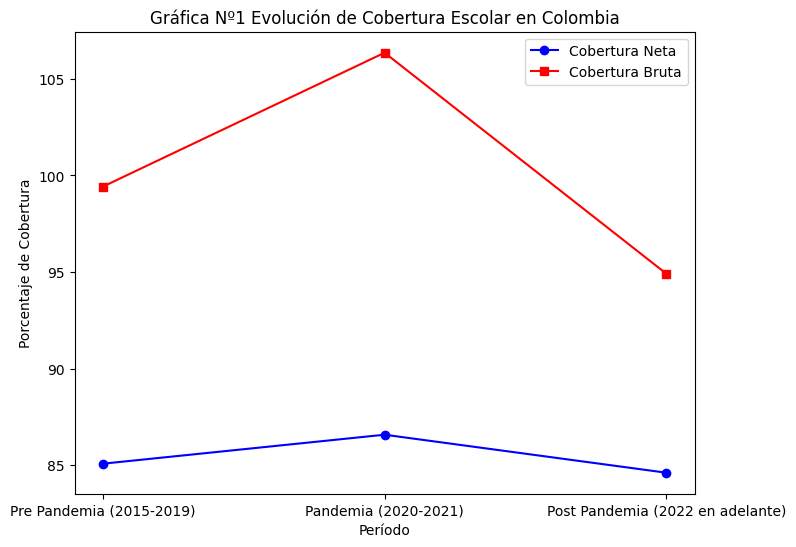

In [29]:
# Visualizamos la evoluci√≥n de la cobertura escolar
# Filtrar datos por per√≠odos clave
pre_pandemia = data[data['A√ëO'].between(2015, 2019)]
pandemia = data[data['A√ëO'].isin([2020, 2021])]
post_pandemia = data[data['A√ëO'] >= 2022]

# Calcular promedio de cobertura bruta y neta por per√≠odo
promedios = pd.DataFrame({
    'Per√≠odo': ['Pre Pandemia (2015-2019)', 'Pandemia (2020-2021)', 'Post Pandemia (2022 en adelante)'],
    'Cobertura Neta': [pre_pandemia['COBERTURA_NETA'].mean(), pandemia['COBERTURA_NETA'].mean(), post_pandemia['COBERTURA_NETA'].mean()],
    'Cobertura Bruta': [pre_pandemia['COBERTURA_BRUTA'].mean(), pandemia['COBERTURA_BRUTA'].mean(), post_pandemia['COBERTURA_BRUTA'].mean()]
})

# Gr√°fico de evoluci√≥n
plt.figure(figsize=(8,6))
plt.plot(promedios['Per√≠odo'], promedios['Cobertura Neta'], marker='o', label='Cobertura Neta', color='blue')
plt.plot(promedios['Per√≠odo'], promedios['Cobertura Bruta'], marker='s', label='Cobertura Bruta', color='red')
plt.xlabel("Per√≠odo")
plt.ylabel("Porcentaje de Cobertura")
plt.title("Gr√°fica N¬∫1 Evoluci√≥n de Cobertura Escolar en Colombia")
plt.legend()
plt.show()

In [30]:
# Seleccionar columnas relevantes
cobertura_cols = [
    'A√ëO', 'COBERTURA_NETA_TRANSICI√ìN', 'COBERTURA_NETA_PRIMARIA',
    'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA',
    'COBERTURA_BRUTA_TRANSICI√ìN', 'COBERTURA_BRUTA_PRIMARIA',
    'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA'
]

df_cobertura = data[cobertura_cols].copy()

# Agrupar por a√±o y calcular promedios nacionales
df_cobertura_grouped = df_cobertura.groupby('A√ëO').mean(numeric_only=True).reset_index()

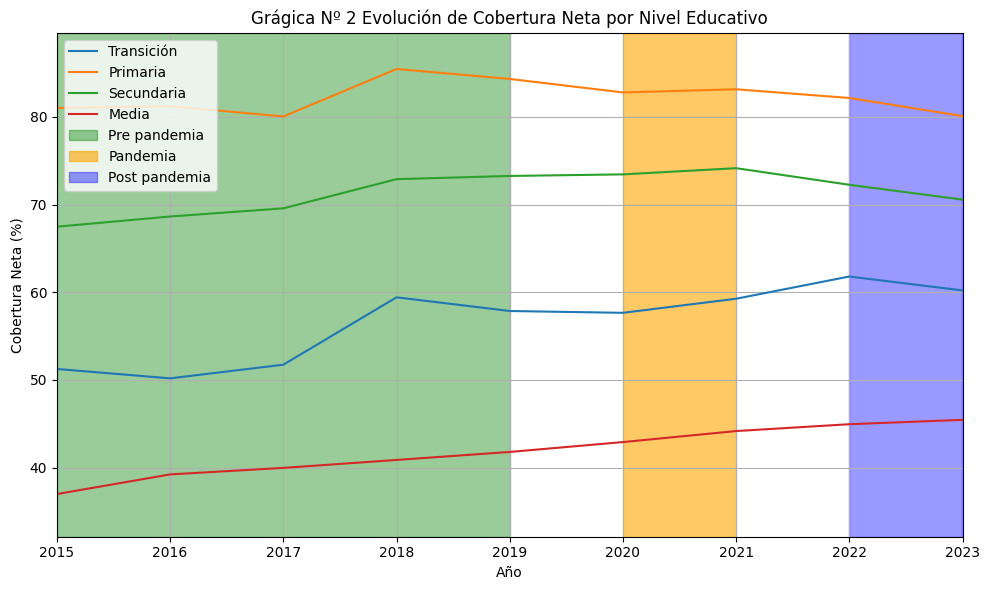

In [31]:
#Visualizar la cobertura neta por nivel de escolaridad
plt.figure(figsize=(10, 6))
for col in ['COBERTURA_NETA_TRANSICI√ìN', 'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA']:
    plt.plot(df_cobertura_grouped['A√ëO'], df_cobertura_grouped[col], label=col.replace('COBERTURA_NETA_', '').capitalize())


# Obtener a√±os disponibles
a√±os = df_cobertura_grouped['A√ëO'].unique()
a√±o_min = max(a√±os.min(), 2015)  # Ejemplo, iniciar desde 2015 o desde m√≠nimo disponible
a√±o_max = a√±os.max()


plt.xlim(a√±o_min, a√±o_max)
plt.xticks(np.arange(a√±o_min, a√±o_max+1, 1))  # ticks cada a√±o


# √Åreas sombreadas m√°s visibles
plt.axvspan(a√±o_min, 2019, color='green', alpha=0.4, label='Pre pandemia')
plt.axvspan(2020, 2021, color='orange', alpha=0.6, label='Pandemia')
plt.axvspan(2022, a√±o_max, color='blue', alpha=0.4, label='Post pandemia')


plt.title('Gr√°gica N¬∫ 2 Evoluci√≥n de Cobertura Neta por Nivel Educativo')
plt.xlabel('A√±o')
plt.ylabel('Cobertura Neta (%)')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.grid(True)
plt.tight_layout()
plt.show()

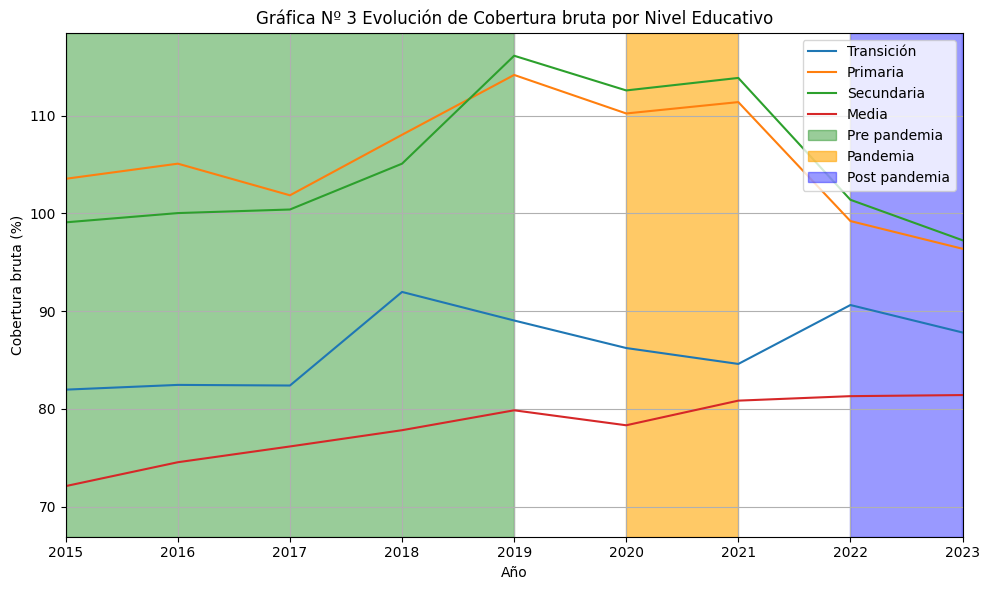

In [32]:
#Visualizar la cobertura bruta por nivel de escolaridad

plt.figure(figsize=(10, 6))

for col in ['COBERTURA_BRUTA_TRANSICI√ìN', 'COBERTURA_BRUTA_PRIMARIA', 'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA']:
    plt.plot(df_cobertura_grouped['A√ëO'], df_cobertura_grouped[col], label=col.replace('COBERTURA_BRUTA_', '').capitalize())

# Obtener a√±os disponibles
a√±os = df_cobertura_grouped['A√ëO'].unique()
a√±o_min = max(a√±os.min(), 2015)  # Ejemplo, iniciar desde 2015 o desde m√≠nimo disponible
a√±o_max = a√±os.max()

plt.xlim(a√±o_min, a√±o_max)
plt.xticks(np.arange(a√±o_min, a√±o_max+1, 1))  # ticks cada a√±o

# √Åreas sombreadas m√°s visibles
plt.axvspan(a√±o_min, 2019, color='green', alpha=0.4, label='Pre pandemia')
plt.axvspan(2020, 2021, color='orange', alpha=0.6, label='Pandemia')
plt.axvspan(2022, a√±o_max, color='blue', alpha=0.4, label='Post pandemia')

plt.title('Gr√°fica N¬∫ 3 Evoluci√≥n de Cobertura bruta por Nivel Educativo')
plt.xlabel('A√±o')
plt.ylabel('Cobertura bruta (%)')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.grid(True)
plt.tight_layout()
plt.show()

üí°2.1.1 --- Hallazgos claves en la evoluci√≥n de la cobertura escolar ---

üìâ Reducci√≥n progresiva en la cobertura escolar despu√©s de la pandemia -  Gr√°fica N¬∫1 "Evoluci√≥n de Cobertura Escolar en Colombia".

 - En la Gr√°fica N¬∫1 "Evoluci√≥n de Cobertura Escolar en Colombia" se observa una disminuci√≥n constante en la cobertura bruta y la cobertura neta a lo largo de la Pandemia y Post Pandemia.

 - La cobertura bruta tuvo una ca√≠da m√°s pronunciada, pasando de cerca de 110% en Pre Pandemia a aproximadamente 100% en Post Pandemia.

 - La cobertura neta tambi√©n muestra una tendencia decreciente, de alrededor de 87% antes de la pandemia a 83% despu√©s de la pandemia.

 - Se nota un mayor impacto en la cobertura bruta.

 - La ca√≠da en cobertura bruta sugiere una menor inscripci√≥n de estudiantes en relaci√≥n con la poblaci√≥n en edad escolar de 5 a 16 a√±os.
 
 -  Esto podr√≠a estar asociado con factores como dificultades econ√≥micas, cambios en la estructura educativa y barreras en el acceso a la educaci√≥n durante la Pandemia, debido al aumento repentino del uso de la virtualidad para evitar contagios del virus COVID-19 y sus variantes. 


üìâ Tendencia a la baja en la cobertura neta - Gr√°gica N¬∫ 2 "Evoluci√≥n de Cobertura Neta por Nivel Educativo"

 - La cobertura neta refleja la relaci√≥n entre el n√∫mero de estudiantes (inscritos/matriculados) que corresponden a la edad de 5 a 16 a√±os y el total de la poblaci√≥n en ese mismo grupo de edades.  

 - Observando la Gr√°gica N¬∫ 2 "Evoluci√≥n de Cobertura Neta por Nivel Educativo", se nota que la cobertura neta muestra una reducci√≥n progresiva durante la Pandemia, a pesar de que su impacto es m√°s estable si la comparamos con la cobertura bruta. 
 
 - Aunque la cobertura neta no disminuye de forma dr√°stica, el descenso podr√≠a indicar que menos estudiantes est√°n completando su ciclo educativo.

 - Esta situaci√≥n podr√≠a estar relacionada con incrementos en la deserci√≥n escolar y posibles interrupciones en la continuidad acad√©mica.


‚ö†Ô∏è Descenso considerable en la cobertura bruta - Gr√°gica N¬∫ 3 "Evoluci√≥n de Cobertura Bruta por Nivel Educativo"
 
- La cobertura bruta refleja la cantidad total de estudiantes matriculados, incluyendo posibles repitentes, mientras que la neta indica el porcentaje de estudiantes que est√°n en el grado correspondiente a su edad.

 - Una ca√≠da marcada en la cobertura bruta puede indicar que menos estudiantes entraron al sistema escolar, lo que podr√≠a relacionarse con obst√°culos como factores econ√≥micos, acceso a educaci√≥n virtual o cambios en pol√≠ticas educativas.

 - La cobertura bruta tuvo una ca√≠da m√°s pronunciada (Gr√°fica N¬∫ 3), pasando de aprox. de 110% en Pre Pandemia (√°rea del g√°fico sombreada con color verde) a aproximadamente 100% en Post Pandemia (√°rea color violeta). La pandemia interrumpi√≥ el crecimiento o estabilidad que ven√≠a d√°ndose en cobertura bruta.
 
 - El impacto es m√°s fuerte en niveles iniciales (transici√≥n) y b√°sicos (primaria y secundaria). El nivel media parece ser el menos afectado.

‚úÖ 2.2 --- Evaluar la relaci√≥n entre la deserci√≥n escolar y factores como repitencia y reprobaci√≥n en el periodo 2020-2022 y su variaci√≥n respecto a los a√±os anteriores ---

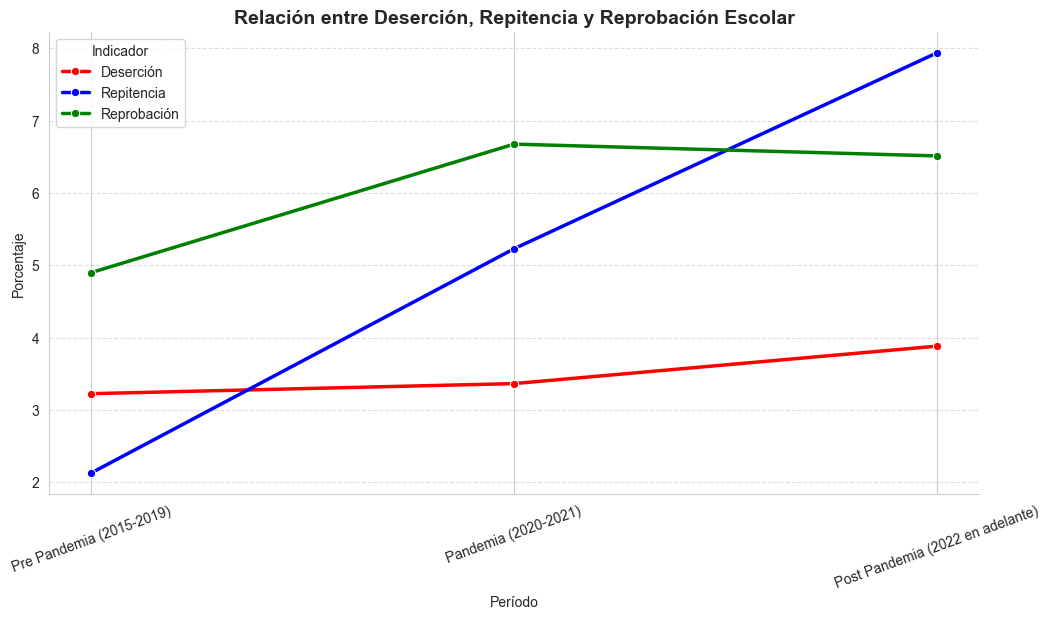

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos por per√≠odos clave
pre_pandemia = data[data['A√ëO'].between(2015, 2019)]
pandemia = data[data['A√ëO'].isin([2020, 2021])]
post_pandemia = data[data['A√ëO'] >= 2022]

# Variables a analizar
resultados = pd.DataFrame({
    'Per√≠odo': ['Pre Pandemia (2015-2019)', 'Pandemia (2020-2021)', 'Post Pandemia (2022 en adelante)'],
    'Deserci√≥n': [pre_pandemia['DESERCI√ìN'].mean(), pandemia['DESERCI√ìN'].mean(), post_pandemia['DESERCI√ìN'].mean()],
    'Repitencia': [pre_pandemia['REPITENCIA'].mean(), pandemia['REPITENCIA'].mean(), post_pandemia['REPITENCIA'].mean()],
    'Reprobaci√≥n': [pre_pandemia['REPROBACI√ìN'].mean(), pandemia['REPROBACI√ìN'].mean(), post_pandemia['REPROBACI√ìN'].mean()]
})

# Configurar estilo moderno de Seaborn
sns.set_style("whitegrid")

# Crear gr√°fica con colores personalizados y tama√±o m√°s ancho
plt.figure(figsize=(12,6))  # Aumenta el ancho del gr√°fico
ax = sns.lineplot(data=resultados.melt(id_vars='Per√≠odo', var_name='Indicador', value_name='Valor'), 
                  x='Per√≠odo', y='Valor', hue='Indicador', marker='o', linewidth=2.5, 
                  palette={'Deserci√≥n': 'red', 'Repitencia': 'blue', 'Reprobaci√≥n': 'green'})

# Mejorar la est√©tica
plt.title("Relaci√≥n entre Deserci√≥n, Repitencia y Reprobaci√≥n Escolar", fontsize=14, fontweight='bold')
plt.xlabel("Per√≠odo")
plt.ylabel("Porcentaje")
plt.xticks(rotation=20)
plt.legend(title="Indicador", fontsize=10)
sns.despine()  # Remover bordes innecesarios
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar gr√°fico
plt.show()


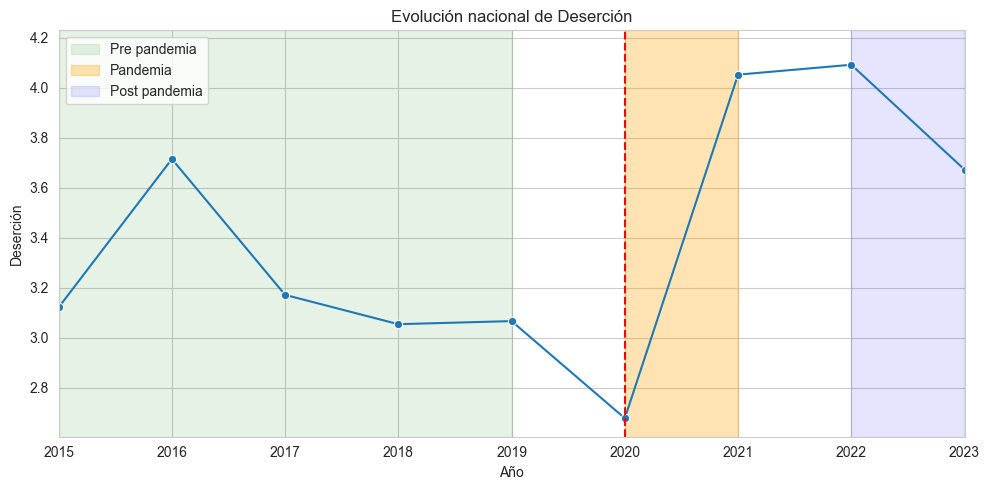

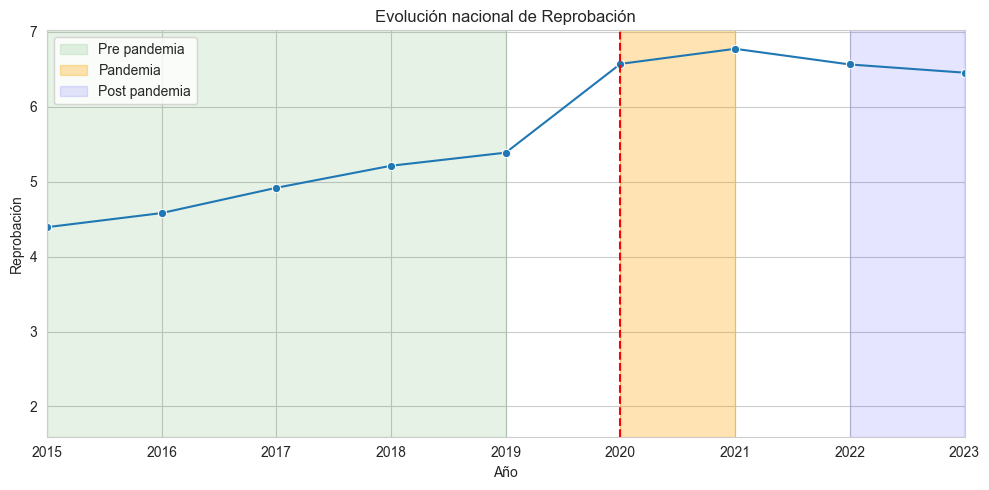

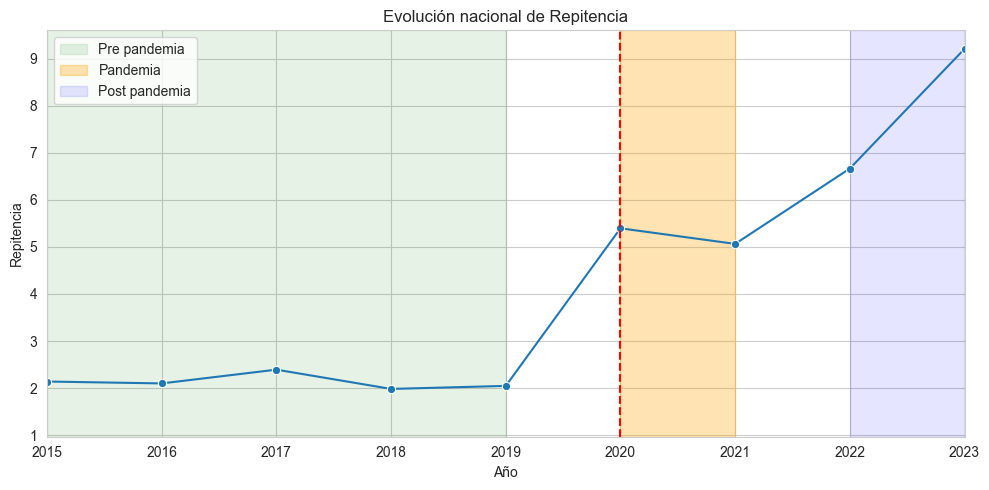

In [34]:
# Evaluar individualmnte la evoluci√≥n de la cobertura bruta, deserci√≥n, aprobaci√≥n, reprobaci√≥n y repitencia
# Verificar columnas de inter√©s
columnas_analisis = [
    "DESERCI√ìN",
    "REPROBACI√ìN", "REPITENCIA"
]
for col in columnas_analisis:
    plt.figure(figsize=(10, 5))


    # Agrupar y calcular promedio por a√±o
    datos = data.groupby("A√ëO")[col].mean()


    # Forzar a√±o m√≠nimo 2015, aunque los datos comiencen despu√©s
    a√±o_min = 2015
    a√±o_max = datos.index.max()


    # L√≠nea de datos
    sns.lineplot(x=datos.index, y=datos.values, marker="o")


    # √Åreas sombreadas
    plt.axvspan(a√±o_min, 2019, color='green', alpha=0.1, label='Pre pandemia')
    plt.axvspan(2020, 2021, color='orange', alpha=0.3, label='Pandemia')
    plt.axvspan(2022, a√±o_max, color='blue', alpha=0.1, label='Post pandemia')


    # L√≠nea vertical para inicio de pandemia
    plt.axvline(2020, color='red', linestyle='--')


    # T√≠tulo y etiquetas
    plt.title(f"Evoluci√≥n nacional de {col.replace('_', ' ').title()}")
    plt.ylabel(col.replace('_', ' ').title())
    plt.xlabel("A√±o")


    # Limitar el eje X
    plt.xlim(a√±o_min, a√±o_max)


    # Evitar leyendas duplicadas
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())


    plt.grid(True)
    plt.tight_layout()

‚úÖ 2.3 --- Visualizar los datos analizados con respecto a las variaciones en cobertura y deserci√≥n escolar teniendo en cuenta los departamentos a nivel nacional---

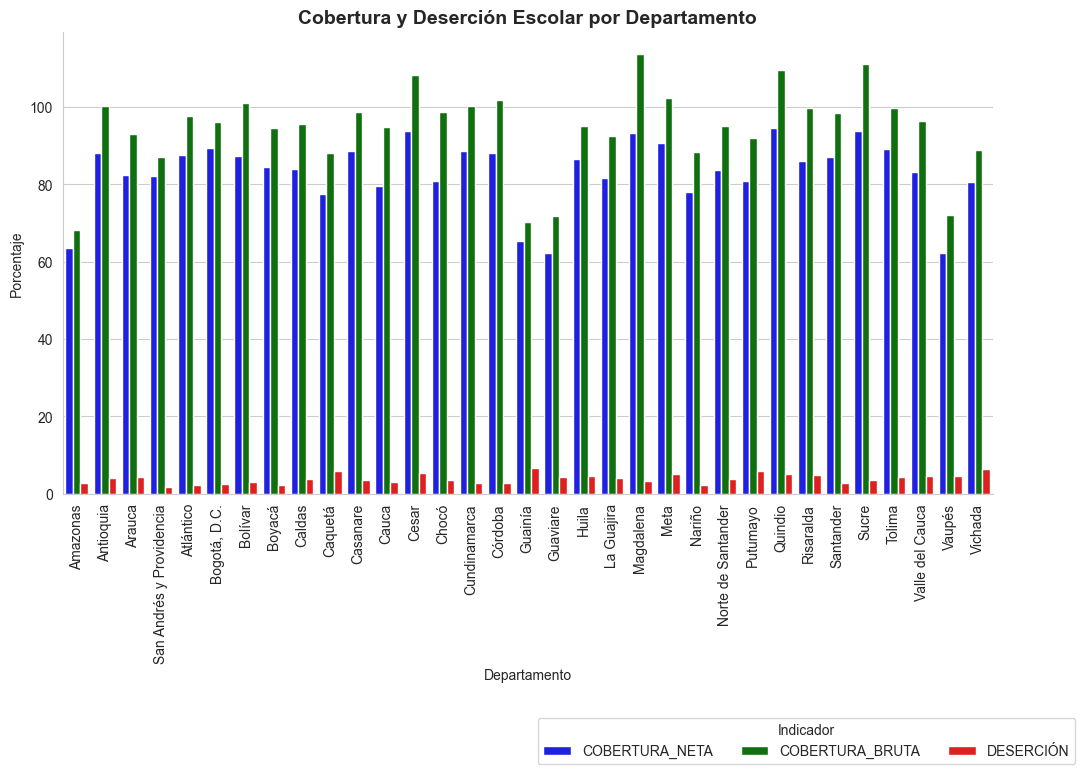

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos por per√≠odos clave
pre_pandemia = data[data['A√ëO'].between(2015, 2019)]
pandemia = data[data['A√ëO'].isin([2020, 2021])]
post_pandemia = data[data['A√ëO'] >= 2022]

# Calcular promedios por departamento y excluir "NACIONAL"
deptos_stats = data.groupby('DEPARTAMENTO')[['COBERTURA_NETA', 'COBERTURA_BRUTA', 'DESERCI√ìN']].mean().reset_index()
deptos_stats = deptos_stats[deptos_stats['DEPARTAMENTO'] != 'NACIONAL']  # Excluir "NACIONAL"

# Abreviar el nombre del departamento "Archipi√©lago de San Andr√©s, Providencia y Santa Catalina"
deptos_stats['DEPARTAMENTO'] = deptos_stats['DEPARTAMENTO'].replace(
    "Archipi√©lago de San Andr√©s, Providencia y Santa Catalina", "San Andr√©s y Providencia"
)

# Configurar estilo visual
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

# Crear gr√°fico de barras con colores espec√≠ficos
sns.barplot(data=deptos_stats.melt(id_vars='DEPARTAMENTO', var_name='Indicador', value_name='Valor'), 
            x='DEPARTAMENTO', y='Valor', hue='Indicador', 
            palette={'COBERTURA_NETA': 'blue', 'COBERTURA_BRUTA': 'green', 'DESERCI√ìN': 'red'})

plt.xticks(rotation=90)
plt.title("Cobertura y Deserci√≥n Escolar por Departamento", fontsize=14, fontweight='bold')
plt.xlabel("Departamento")
plt.ylabel("Porcentaje")

# Posicionar la leyenda debajo de la etiqueta del eje X
plt.legend(title="Indicador", fontsize=10, loc='lower center', bbox_to_anchor=(0.8, -0.6), ncol=3)
sns.despine()

# Mostrar gr√°fico
plt.show()

‚úÖ 2.4 --- Realizar una proyecci√≥n de la deserci√≥n, repitencia y cobertura bruta para 2026 utilizando modelos de machine learning (aprendizaje autom√°tico), con base en las tendencias observadas entre 2015 y 2022 ---

OPCION 1: Con RandomForestRegressor en su versi√≥n multisalida usando MultiOutputRegressor podemos predecir de forma simult√°nea los tres indicadores (DESERCI√ìN, REPITENCIA y COBERTURA_BRUTA) bas√°ndonos en caracter√≠sticas creadas a partir de lags de la serie anual.

In [36]:
# 1. Preparar la serie anual de m√∫ltiples indicadores

# Convertir la columna 'A√ëO' a datetime y agrupar por a√±o (promedio de indicadores)
data['A√ëO'] = pd.to_datetime(data['A√ëO'], format='%Y')
data_yearly = data.groupby(data['A√ëO'].dt.year)[['DESERCI√ìN', 'REPITENCIA', 'COBERTURA_BRUTA']].mean().reset_index()
data_yearly.columns = ['Year', 'DESERCI√ìN', 'REPITENCIA', 'COBERTURA_BRUTA']

# Convertir 'Year' a datetime y establecerla como √≠ndice
data_yearly['Year'] = pd.to_datetime(data_yearly['Year'], format='%Y')
data_yearly = data_yearly.set_index('Year').sort_index()

print("Serie anual de indicadores:")
print(data_yearly)

Serie anual de indicadores:
            DESERCI√ìN  REPITENCIA  COBERTURA_BRUTA
Year                                              
2011-01-01   4.156266    1.370392       101.023440
2012-01-01   4.033699    1.358922        98.902406
2013-01-01   3.449537    1.442629        99.374866
2014-01-01   3.065339    1.618663        97.228253
2015-01-01   3.122317    2.139153        95.538253
2016-01-01   3.715481    2.099002        96.341889
2017-01-01   3.172246    2.391310        95.392005
2018-01-01   3.054991    1.981970       100.759599
2019-01-01   3.067392    2.046298       109.056937
2020-01-01   2.678882    5.394283       105.749929
2021-01-01   4.052904    5.063354       106.962507
2022-01-01   4.092545    6.663687        96.303813
2023-01-01   3.673357    9.206384        93.516384


In [37]:
# 2. Crear variables de lag para la predicci√≥n multisalida

def create_multi_lag_features(df, cols, lags=3):
    """
    Para cada columna en `cols`, crea nuevas columnas correspondientes a cada lag.
    Ejemplo: para lag=1 y la columna DESERCI√ìN se crea "DESERCI√ìN_lag1".
    """
    df_new = df.copy()
    for lag in range(1, lags+1):
        for col in cols:
            df_new[f'{col}_lag{lag}'] = df_new[col].shift(lag)
    return df_new.dropna()

# Definir las columnas objetivo
target_cols = ['DESERCI√ìN', 'REPITENCIA', 'COBERTURA_BRUTA']

# Crear el DataFrame con features de lag (usaremos 3 lags)
df_multi = create_multi_lag_features(data_yearly, target_cols, lags=3)

# Revisar las primeras filas
print("\nDatos con variables de lag:")
print(df_multi.head())


Datos con variables de lag:
            DESERCI√ìN  REPITENCIA  COBERTURA_BRUTA  DESERCI√ìN_lag1  \
Year                                                                 
2014-01-01   3.065339    1.618663        97.228253        3.449537   
2015-01-01   3.122317    2.139153        95.538253        3.065339   
2016-01-01   3.715481    2.099002        96.341889        3.122317   
2017-01-01   3.172246    2.391310        95.392005        3.715481   
2018-01-01   3.054991    1.981970       100.759599        3.172246   

            REPITENCIA_lag1  COBERTURA_BRUTA_lag1  DESERCI√ìN_lag2  \
Year                                                                
2014-01-01         1.442629             99.374866        4.033699   
2015-01-01         1.618663             97.228253        3.449537   
2016-01-01         2.139153             95.538253        3.065339   
2017-01-01         2.099002             96.341889        3.122317   
2018-01-01         2.391310             95.392005        3.7154

In [38]:
# separamos las variables predictoras (features) y las variables objetivo (targets)

# Seleccionar las columnas de lag (features) y las columnas originales (targets)
lag_cols = [col for col in df_multi.columns if '_lag' in col]
X_multi = df_multi[lag_cols]
Y_multi = df_multi[target_cols]

In [39]:
# 3. Dividir los datos en conjuntos de entrenamiento y prueba

# Usamos los dos √∫ltimos registros para test
X_train_multi = X_multi.iloc[:-2]
X_test_multi  = X_multi.iloc[-2:]
Y_train_multi = Y_multi.iloc[:-2]
Y_test_multi  = Y_multi.iloc[-2:]


In [40]:
# 4. Ajustar el modelo RandomForestRegressor multisalida

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Inicializar el modelo base y envolverlo para predicci√≥n multisalida
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf_model = MultiOutputRegressor(rf)

# Entrenar el modelo
multi_rf_model.fit(X_train_multi, Y_train_multi)

# Realizar predicciones en el conjunto de test
Y_pred_multi = multi_rf_model.predict(X_test_multi)
rmse_multi = np.sqrt(mean_squared_error(Y_test_multi, Y_pred_multi))
print("\nRMSE MultiOutput RandomForestRegressor en test:", rmse_multi)


RMSE MultiOutput RandomForestRegressor en test: 4.795840832115007


In [41]:
# 5. Pron√≥stico futuro de los 3 indicadores de forma recursiva

# Determinar el horizonte futuro: suponiendo que queremos predicciones hasta el 2026
ultimo_a√±o = data_yearly.index.year.max()  # √∫ltimo a√±o disponible en la serie
horizonte_futuro = 2026 - ultimo_a√±o
horizonte_futuro = int(horizonte_futuro)

# Para preparar la primera predicci√≥n, extraemos los √∫ltimos 3 registros de cada indicador.
# Recordemos que el vector de features se forma de la siguiente manera:
#   [valor m√°s reciente para cada indicador (lag1),
#    valor del pen√∫ltimo a√±o para cada indicador (lag2),
#    valor del antepen√∫ltimo a√±o para cada indicador (lag3)]
last_t = data_yearly[target_cols].iloc[-1].values          # Valor en el √∫ltimo a√±o (lag1)
last_t_minus1 = data_yearly[target_cols].iloc[-2].values     # (lag2)
last_t_minus2 = data_yearly[target_cols].iloc[-3].values     # (lag3)

# Concatena estos vectores para formar la primera fila de features (debe coincidir con el orden usado en la funci√≥n de creaci√≥n de lags)
X_future = np.concatenate([last_t, last_t_minus1, last_t_minus2])

future_predictions_multi = []

for i in range(horizonte_futuro):
    # Predecir el vector de indicadores para el siguiente per√≠odo
    pred = multi_rf_model.predict(X_future.reshape(1, -1))[0]  # pred es un vector de 3 elementos
    future_predictions_multi.append(pred)
    
    # Actualizar el vector de features para la siguiente predicci√≥n:
    # Descartamos el bloque correspondiente al lag3; el nuevo vector de features ser√°:
    # nuevo lag1: la predicci√≥n actual,
    # nuevo lag2: el antiguo lag1 (los 3 valores de X_future correspondientes a los primeros 3 elementos),
    # nuevo lag3: el antiguo lag2 (los 3 elementos desde la posici√≥n 3 a 6).
    new_lag1 = pred
    new_lag2 = X_future[0:3]
    new_lag3 = X_future[3:6]
    X_future = np.concatenate([new_lag1, new_lag2, new_lag3])

print("\nPron√≥stico futuro MultiOutput con RandomForestRegressor (hasta 2026):")
for i, pred in enumerate(future_predictions_multi):
    a√±o_pred = ultimo_a√±o + i + 1
    desercion, repitencia, cobertura = pred
    print(f"A√±o {a√±o_pred}: DESERCI√ìN={desercion:.2f}, REPITENCIA={repitencia:.2f}, COBERTURA_BRUTA={cobertura:.2f}")


Pron√≥stico futuro MultiOutput con RandomForestRegressor (hasta 2026):
A√±o 2024: DESERCI√ìN=3.41, REPITENCIA=2.30, COBERTURA_BRUTA=99.89
A√±o 2025: DESERCI√ìN=3.14, REPITENCIA=2.13, COBERTURA_BRUTA=101.08
A√±o 2026: DESERCI√ìN=3.14, REPITENCIA=2.42, COBERTURA_BRUTA=102.83


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sk

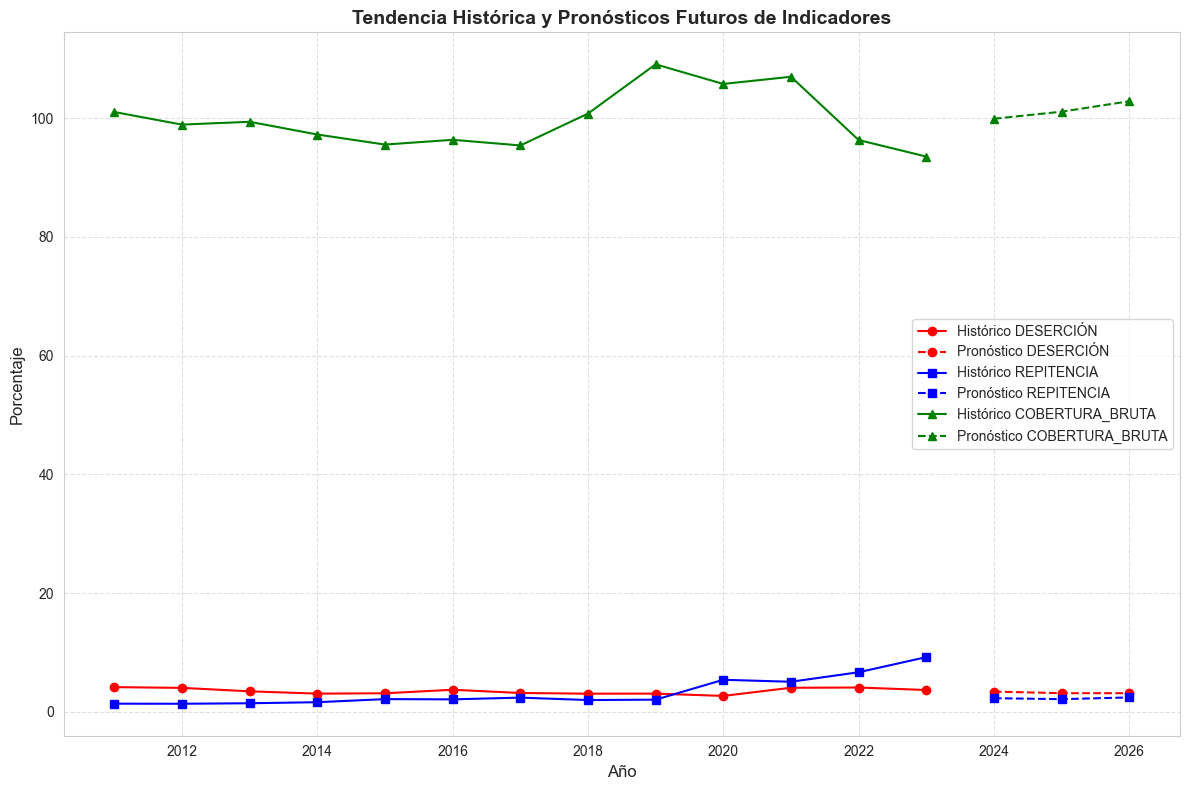

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'ultimo_a√±o' es el √∫ltimo a√±o disponible en data_yearly (por ejemplo, 2022)
# y 'horizonte_futuro' es la cantidad de a√±os a predecir (por ejemplo, 2026 - 2022)
# Generamos la lista de a√±os futuros
future_years = [ultimo_a√±o + i for i in range(1, horizonte_futuro + 1)]

# Convertir la lista de predicciones (que es una lista de arrays de 3 elementos)
# en un DataFrame usando los a√±os futuros como √≠ndice.
future_forecast_df = pd.DataFrame(
    future_predictions_multi,
    columns=['DESERCI√ìN', 'REPITENCIA', 'COBERTURA_BRUTA'],
    index=[pd.to_datetime(str(year), format='%Y') for year in future_years]
)

# Graficar las tendencias hist√≥ricas y las predicciones futuras para cada indicador
plt.figure(figsize=(12, 8))

# Gr√°fico para DESERCI√ìN
plt.plot(data_yearly.index, data_yearly['DESERCI√ìN'], label='Hist√≥rico DESERCI√ìN', marker='o', color='red')
plt.plot(future_forecast_df.index, future_forecast_df['DESERCI√ìN'], label='Pron√≥stico DESERCI√ìN', marker='o', linestyle='--', color='red')

# Gr√°fico para REPITENCIA
plt.plot(data_yearly.index, data_yearly['REPITENCIA'], label='Hist√≥rico REPITENCIA', marker='s', color='blue')
plt.plot(future_forecast_df.index, future_forecast_df['REPITENCIA'], label='Pron√≥stico REPITENCIA', marker='s', linestyle='--', color='blue')

# Gr√°fico para COBERTURA_BRUTA
plt.plot(data_yearly.index, data_yearly['COBERTURA_BRUTA'], label='Hist√≥rico COBERTURA_BRUTA', marker='^', color='green')
plt.plot(future_forecast_df.index, future_forecast_df['COBERTURA_BRUTA'], label='Pron√≥stico COBERTURA_BRUTA', marker='^', linestyle='--', color='green')

plt.title('Tendencia Hist√≥rica y Pron√≥sticos Futuros de Indicadores', fontsize=14, fontweight='bold')
plt.xlabel('A√±o', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()